In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
import itertools


import tensorflow
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import History 

from numpy.random import seed
seed(123)

# Load in Data

In [3]:
df = pd.read_csv('dataset/creditcard.csv')

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.info()
# Looks like all the features are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Data cleaning

In [6]:
df.isnull().sum()

# so there are no missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [9]:
# handle outliers

In [10]:
cols = df.columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

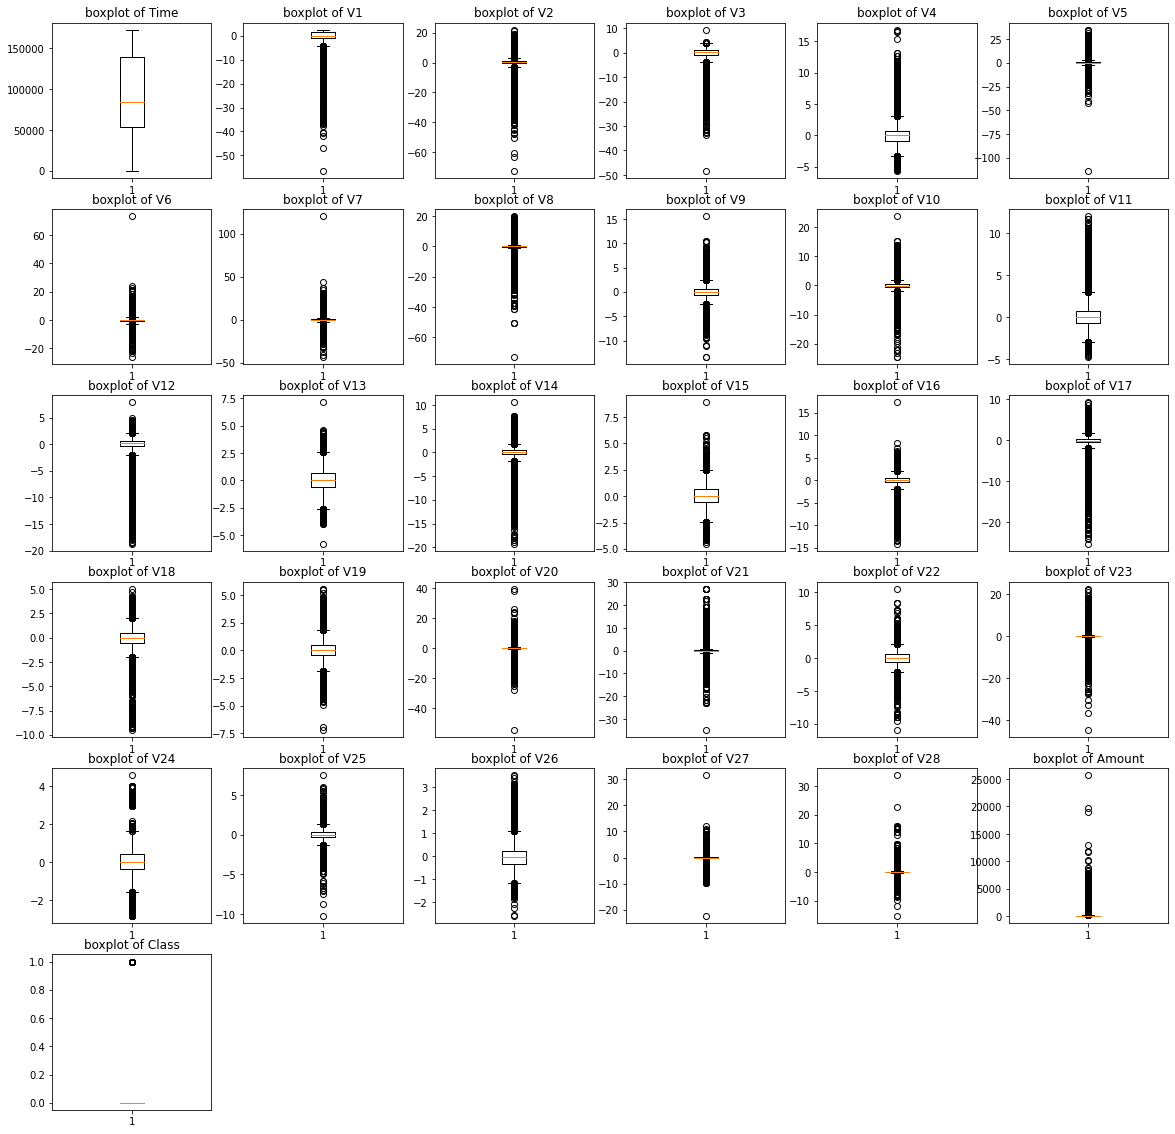

In [11]:
fig = plt.figure(figsize=(20, 20))
for i in range(31):
    ax = fig.add_subplot(6, 6, i+1)
    plt.boxplot(df[cols[i]])
    plt.title('boxplot of {}'.format(cols[i]))

In [12]:
# drop one outlier in feature V3, V5, V6, V7, V27 (they are the same observation)
df1 = df[df.V3 >  -40]

In [13]:
# drop one outlier in feature V8, V15, V16, V21, V27, V28, Amount
df1 = df1[df1.V8 > -60]
df1 = df1[df1.V27 > -18]
df1 = df1[df1.V28 < 20]
df1 = df1[df1.Amount < 18000]

# we total drop 7 observations

In [14]:
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Data exploration

(array([284308.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    492.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

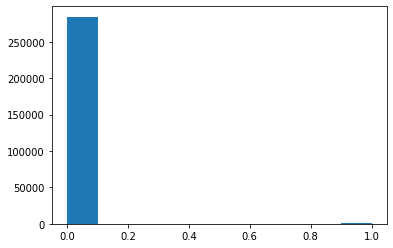

In [15]:
# plot the target variable
plt.hist(df1.Class)

# Class1 (Fraud is much fewer cases than normal transaction, so the target is not normally ditributed)

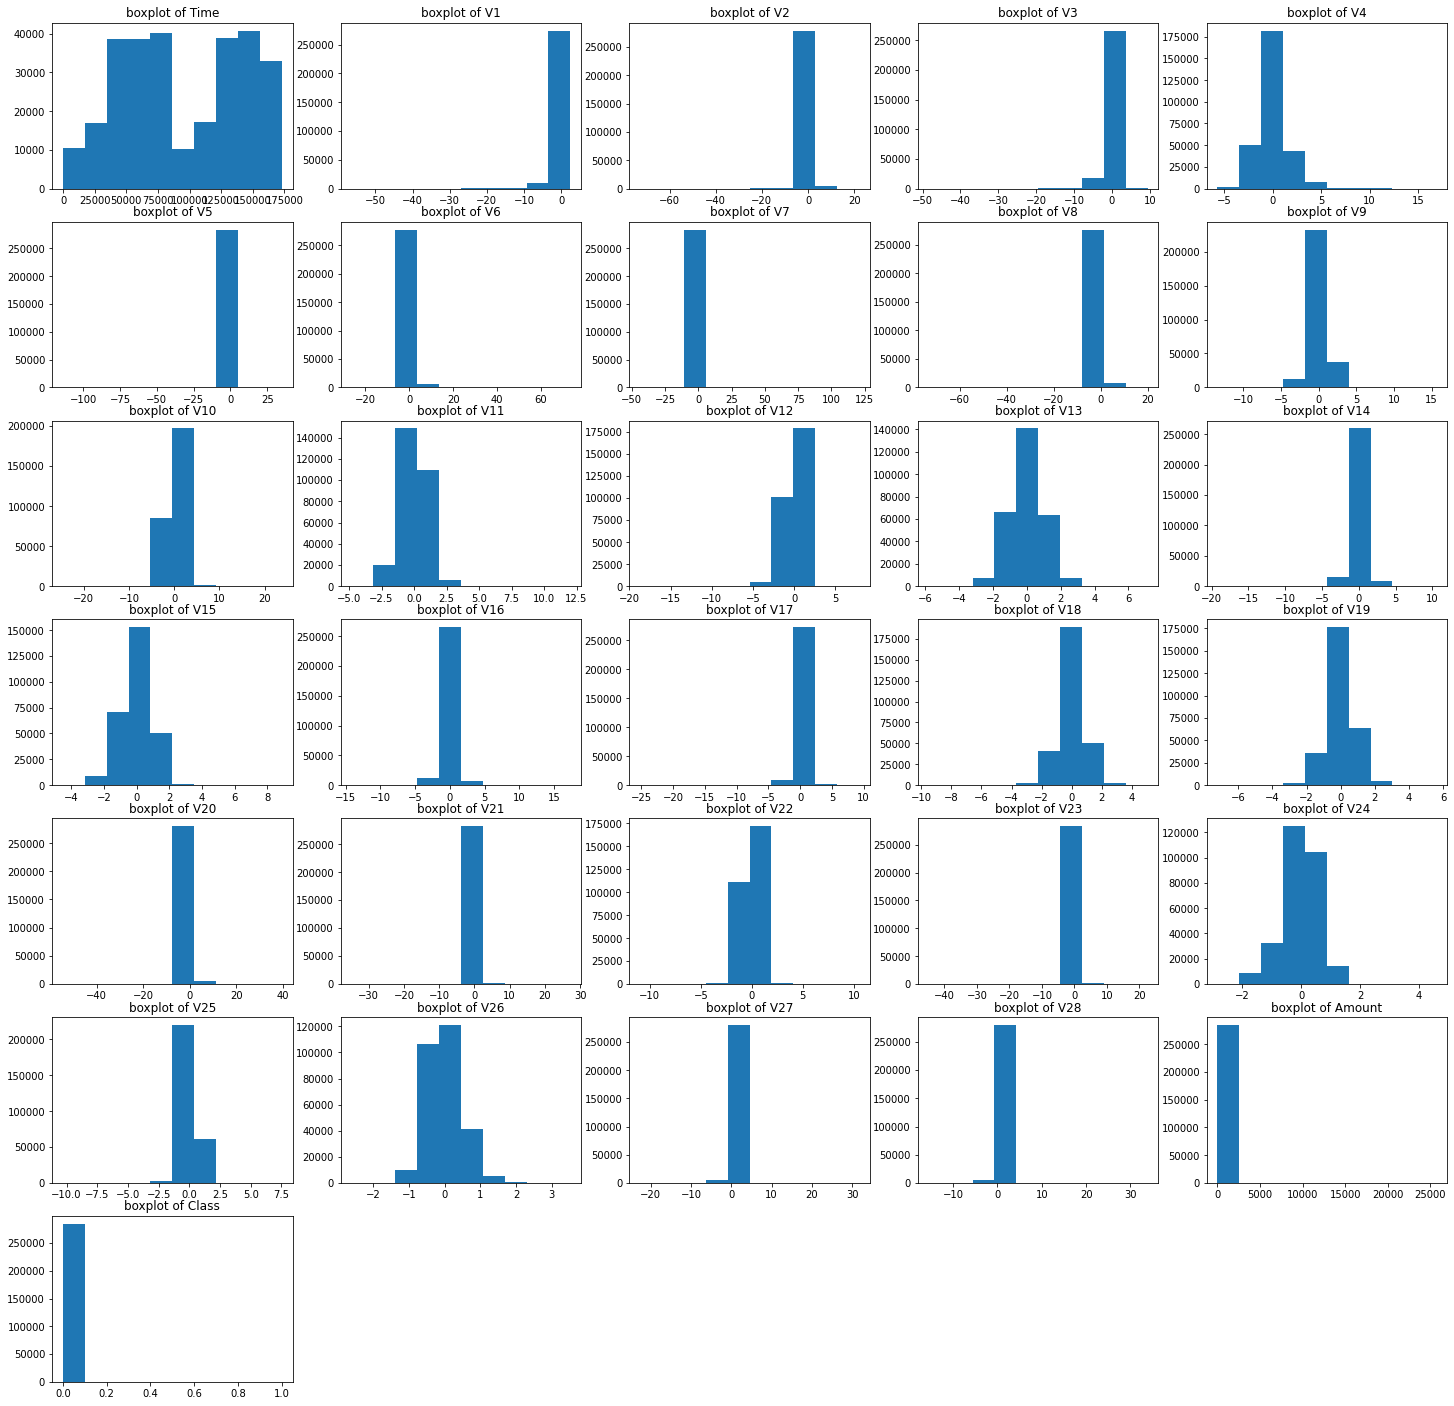

In [16]:
fig = plt.figure(figsize=(25, 25))
for i in range(31):
    ax = fig.add_subplot(7, 5, i+1)
    plt.hist(df[cols[i]])
    plt.title('boxplot of {}'.format(cols[i]))

<AxesSubplot:>

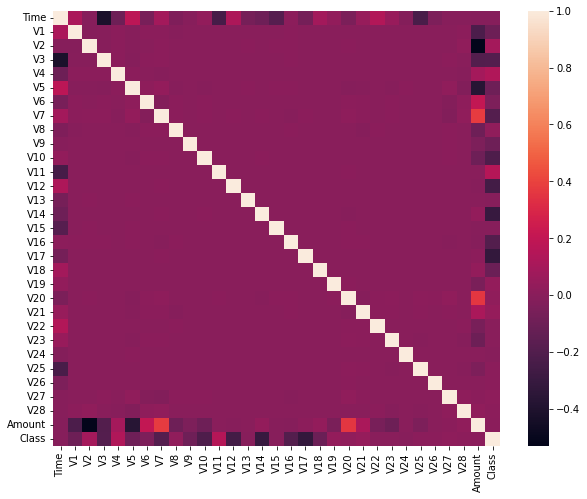

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr())

# Feature engineering

In [18]:
X = df1.drop(columns='Class', axis = 1)
Y = df1.Class

In [19]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [20]:
X['Normalized_amount']=StandardScaler().fit_transform(X['Amount'].values.reshape(-1,1))
X.drop(columns='Amount', axis =1, inplace=True)

In [21]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Normalized_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.256107
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.355749
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.209891
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.147336
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.075494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.363745
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.263719
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.084281
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.325309


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [23]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [24]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Normalized_amount
0,75845.0,1.076908,-0.161722,1.351710,0.736634,-0.829841,0.401093,-0.703395,0.265257,0.444741,...,-0.034865,0.018460,0.306700,0.054487,0.297828,0.169618,0.311720,0.038429,0.019091,-0.319104
1,163746.0,0.062986,0.851098,-0.356729,-0.615045,0.860898,-0.558719,0.735724,0.134512,-0.109297,...,-0.061824,-0.289894,-0.788783,0.122793,0.564437,-0.527240,0.096927,0.212514,0.072550,-0.363245
2,172760.0,-6.713826,2.369104,-3.534768,-0.368259,-1.721030,-1.322808,-0.190876,0.891149,2.068476,...,-1.002096,0.131247,0.994246,-0.002140,-0.072979,-0.167159,-0.387271,-2.616341,0.474584,-0.285373
3,148032.0,0.143226,0.510641,0.684724,-0.679671,0.448318,0.265806,0.333893,-0.087773,0.644174,...,-0.085987,-0.062689,-0.083620,0.015459,-1.097501,-1.052173,-0.679829,-0.266517,-0.117739,-0.362787
4,42629.0,1.109104,0.163320,0.215165,1.107842,-0.133295,-0.481173,0.202108,-0.105647,-0.022833,...,-0.080377,0.083709,0.213920,-0.111080,0.088247,0.596388,-0.303719,0.021056,0.025196,-0.150409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227835,129717.0,-0.912992,0.105052,0.936147,3.678577,3.815067,4.887031,-0.693406,1.130899,-1.622395,...,0.575778,0.122586,0.435236,-0.337111,0.744639,0.571560,0.699474,-0.068252,-0.129835,-0.366951
227836,28869.0,-1.039001,0.950070,0.389899,-1.217401,1.855856,3.640886,-0.549604,1.505694,-0.559184,...,0.177503,-0.090529,-0.491079,-0.179921,1.004741,0.317712,0.281484,0.153761,0.062423,-0.342007
227837,34819.0,1.129333,0.471653,0.657500,2.454111,-0.091741,-0.089917,0.008581,0.060009,-0.623285,...,-0.212507,-0.048241,-0.201293,0.053427,0.027638,0.321256,-0.042526,0.001532,0.021002,-0.317022
227838,167911.0,-3.792404,0.892664,-2.993585,-0.274413,0.374075,0.228881,-1.947481,-4.286803,-1.480402,...,0.089477,-2.399329,1.341115,0.406101,0.307432,0.269472,0.617649,-0.377920,-0.779382,-0.363786


In [25]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
227835    0
227836    0
227837    0
227838    0
227839    0
Name: Class, Length: 227840, dtype: int64

## SMOTE 

In [26]:
# SMOTE only applied on trainning dataset

In [28]:
smote = SMOTE(sampling_strategy=0.1, k_neighbors=4, random_state=123)

X_train_sm, Y_train_sm = smote.fit_resample(X_train, y_train)

In [80]:
under = RandomUnderSampler(sampling_strategy=0.4)
X_train_smu, Y_train_smu = under.fit_resample(X_train_sm, Y_train_sm)

In [29]:
X_train_sm

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Normalized_amount
0,75845.000000,1.076908,-0.161722,1.351710,0.736634,-0.829841,0.401093,-0.703395,0.265257,0.444741,...,-0.034865,0.018460,0.306700,0.054487,0.297828,0.169618,0.311720,0.038429,0.019091,-0.319104
1,163746.000000,0.062986,0.851098,-0.356729,-0.615045,0.860898,-0.558719,0.735724,0.134512,-0.109297,...,-0.061824,-0.289894,-0.788783,0.122793,0.564437,-0.527240,0.096927,0.212514,0.072550,-0.363245
2,172760.000000,-6.713826,2.369104,-3.534768,-0.368259,-1.721030,-1.322808,-0.190876,0.891149,2.068476,...,-1.002096,0.131247,0.994246,-0.002140,-0.072979,-0.167159,-0.387271,-2.616341,0.474584,-0.285373
3,148032.000000,0.143226,0.510641,0.684724,-0.679671,0.448318,0.265806,0.333893,-0.087773,0.644174,...,-0.085987,-0.062689,-0.083620,0.015459,-1.097501,-1.052173,-0.679829,-0.266517,-0.117739,-0.362787
4,42629.000000,1.109104,0.163320,0.215165,1.107842,-0.133295,-0.481173,0.202108,-0.105647,-0.022833,...,-0.080377,0.083709,0.213920,-0.111080,0.088247,0.596388,-0.303719,0.021056,0.025196,-0.150409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250185,150138.615864,-4.941934,-0.831160,-4.874109,0.938769,-0.474137,-0.595743,-0.555744,-0.762304,-1.024102,...,-0.983293,0.107693,0.946729,0.177996,-0.035274,0.630529,-0.173147,0.021629,0.060922,0.321513
250186,111635.314935,-1.536505,1.990703,-5.176320,2.883601,-0.351075,-1.353072,-3.622985,1.170250,-1.362525,...,0.479933,0.668432,0.163569,-0.366289,-0.351564,0.022876,0.883116,0.377209,-0.100564,-0.349426
250187,41525.436431,-12.418385,6.651539,-13.747909,7.670097,-10.441972,-2.072215,-12.846397,5.707719,-6.551836,...,-0.941664,1.020420,-0.662677,-1.768864,0.529683,-1.030285,-0.386839,-1.348825,-0.747488,0.790722
250188,41157.490967,-5.695924,4.408711,-9.084671,7.253741,-5.963133,-3.425075,-10.930493,3.592399,-5.977341,...,1.175357,2.135720,0.227112,-0.204429,0.437734,-0.320904,0.473273,1.965489,0.419371,-0.212654


In [81]:
X_train_smu

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Normalized_amount
0,65747.000000,-3.448438,-5.571248,2.588841,-0.088773,3.301009,-1.999084,-3.891063,0.694216,0.774886,...,0.789899,0.014788,-0.321774,0.860622,-0.310303,-0.706810,0.852545,-0.148409,0.045697,-0.250768
1,148839.000000,2.301831,-0.567456,-2.566312,-1.251753,0.674365,-0.639643,0.178726,-0.447802,-0.929376,...,0.080164,0.242193,0.646220,-0.138230,-0.311730,0.515734,0.044589,-0.078340,-0.077414,-0.215788
2,157463.000000,-0.023955,0.290717,0.935087,-0.139546,0.693999,1.666859,-0.184846,0.506445,0.245541,...,-0.006846,0.406965,1.514966,0.112612,-0.250719,-1.407223,0.646047,0.306083,0.247935,-0.328140
3,145226.000000,2.083617,0.565970,-3.353498,0.514738,1.438395,-1.048235,0.638852,-0.237919,-0.073617,...,-0.167736,-0.047674,-0.002137,-0.084217,0.096758,0.376348,0.693083,-0.088667,-0.029355,-0.363786
4,140039.000000,0.303832,1.131325,-1.244758,-0.886137,1.664899,-0.800764,1.146830,-0.308872,0.663151,...,0.143472,-0.183210,-0.079332,-0.268439,-0.157578,0.269563,-0.643756,0.096806,-0.175681,-0.331055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159206,96528.000851,-7.670874,7.550482,-8.255744,8.011423,-5.560123,1.637606,-13.041355,-10.042113,-4.469085,...,3.400689,-5.292497,2.612288,1.106804,-0.277366,-0.509430,0.408244,-0.913273,-0.036197,-0.256741
159207,148354.675587,-0.440622,3.408655,-6.234601,4.397061,0.111530,-1.862381,-2.147792,0.842082,-2.889986,...,0.412399,0.905503,0.839312,-0.082584,0.197233,-0.656273,-0.007307,0.646910,0.562713,-0.362795
159208,146078.765471,0.730872,2.839573,-5.784235,5.522518,-0.109295,-2.462180,-1.906204,0.448265,-2.657011,...,0.259370,0.449650,-0.305057,-0.029947,-0.137377,0.352310,0.274818,0.561295,0.279413,-0.293294
159209,56827.920630,-0.123647,2.407571,-4.071063,3.338138,-0.705729,-1.256557,-2.994666,0.797147,-1.678879,...,0.587153,0.325868,-0.678434,-0.260417,-0.834962,0.861740,-0.112708,0.848135,0.446415,-0.363237


In [32]:
y_train[y_train==0]

0         0
1         0
2         0
3         0
4         0
         ..
227835    0
227836    0
227837    0
227838    0
227839    0
Name: Class, Length: 227446, dtype: int64

In [33]:
y_train[y_train == 1].shape

(394,)

In [34]:
Y_train_sm[Y_train_sm == 0].shape

(227446,)

In [35]:
Y_train_sm[Y_train_sm == 1].shape

(22744,)

In [36]:
X_train_sm

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Normalized_amount
0,75845.000000,1.076908,-0.161722,1.351710,0.736634,-0.829841,0.401093,-0.703395,0.265257,0.444741,...,-0.034865,0.018460,0.306700,0.054487,0.297828,0.169618,0.311720,0.038429,0.019091,-0.319104
1,163746.000000,0.062986,0.851098,-0.356729,-0.615045,0.860898,-0.558719,0.735724,0.134512,-0.109297,...,-0.061824,-0.289894,-0.788783,0.122793,0.564437,-0.527240,0.096927,0.212514,0.072550,-0.363245
2,172760.000000,-6.713826,2.369104,-3.534768,-0.368259,-1.721030,-1.322808,-0.190876,0.891149,2.068476,...,-1.002096,0.131247,0.994246,-0.002140,-0.072979,-0.167159,-0.387271,-2.616341,0.474584,-0.285373
3,148032.000000,0.143226,0.510641,0.684724,-0.679671,0.448318,0.265806,0.333893,-0.087773,0.644174,...,-0.085987,-0.062689,-0.083620,0.015459,-1.097501,-1.052173,-0.679829,-0.266517,-0.117739,-0.362787
4,42629.000000,1.109104,0.163320,0.215165,1.107842,-0.133295,-0.481173,0.202108,-0.105647,-0.022833,...,-0.080377,0.083709,0.213920,-0.111080,0.088247,0.596388,-0.303719,0.021056,0.025196,-0.150409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250185,150138.615864,-4.941934,-0.831160,-4.874109,0.938769,-0.474137,-0.595743,-0.555744,-0.762304,-1.024102,...,-0.983293,0.107693,0.946729,0.177996,-0.035274,0.630529,-0.173147,0.021629,0.060922,0.321513
250186,111635.314935,-1.536505,1.990703,-5.176320,2.883601,-0.351075,-1.353072,-3.622985,1.170250,-1.362525,...,0.479933,0.668432,0.163569,-0.366289,-0.351564,0.022876,0.883116,0.377209,-0.100564,-0.349426
250187,41525.436431,-12.418385,6.651539,-13.747909,7.670097,-10.441972,-2.072215,-12.846397,5.707719,-6.551836,...,-0.941664,1.020420,-0.662677,-1.768864,0.529683,-1.030285,-0.386839,-1.348825,-0.747488,0.790722
250188,41157.490967,-5.695924,4.408711,-9.084671,7.253741,-5.963133,-3.425075,-10.930493,3.592399,-5.977341,...,1.175357,2.135720,0.227112,-0.204429,0.437734,-0.320904,0.473273,1.965489,0.419371,-0.212654


## Cross-validation setup and metric function

In [37]:
num_kfold = 5
kfold = KFold(n_splits=5, shuffle=True, random_state=123)
kfold.get_n_splits()

5

In [38]:
for train_ind, val_ind in kfold.split(X_train_sm):    
    X_train_kfold, X_val_kfold = np.array(X_train_sm)[train_ind], np.array(X_train_sm)[val_ind]
    Y_train_kfold, Y_val_kfold = np.array(Y_train_sm)[train_ind], np.array(Y_train_sm)[val_ind]
    print(train_ind, val_ind)

[     0      1      2 ... 250187 250188 250189] [     9     13     21 ... 250170 250173 250183]
[     0      1      3 ... 250185 250187 250189] [     2     10     14 ... 250181 250186 250188]
[     0      2      3 ... 250187 250188 250189] [     1      5      6 ... 250178 250179 250185]
[     0      1      2 ... 250187 250188 250189] [     7     11     12 ... 250167 250180 250184]
[     1      2      5 ... 250185 250186 250188] [     0      3      4 ... 250182 250187 250189]


In [39]:
def opt_metric(y_test, predictions):

    acc = accuracy_score(y_test, predictions)
    prec = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    
    report = classification_report(y_test, predictions, target_names=['Not Fraud', 'Fraud'])
    
    auc = roc_auc_score(y_test, predictions)

    print('Accuracy score: {:.2f}'.format(acc))
    print('Precision score: {:.2f}'.format(prec))
    print('Recall score: {:.2f}'.format(recall))
    print('F1 score: {:.2f}'.format(f1))
    print(report)
    
    return(acc, prec, recall, f1, auc)


In [40]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [41]:
metric_df = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1', 'auc'], 
                        dtype='float')

## Deep learning model

In [42]:
# First create an intial model

In [44]:
X_train_sm_sp, X_val_sm_sp, Y_train_sm_sp, Y_val_sm_sp = train_test_split(X_train_sm, Y_train_sm, test_size=0.2)

X_train_smu_sp, X_val_smu_sp, Y_train_smu_sp, Y_val_smu_sp = train_test_split(X_train_smu, Y_train_smu, test_size=0.2)

In [45]:
X_train_sm_sp.shape

(200152, 30)

In [46]:
Y_train_sm_sp.sum()

18136

In [47]:
X_val_sm_sp.shape

(50038, 30)

In [48]:
Y_val_sm_sp.sum()

4608

In [123]:

# final model
tensorflow.random.set_seed(123)

model_dp = Sequential()
model_dp.add(Dense(60, input_shape=(30, ), activation='relu'))
model_dp.add(Dropout(0.2))
model_dp.add(Dense(60,  activation='relu'))

model_dp.add(Dense(1, activation='sigmoid'))
history = History()    
opt = keras.optimizers.Adam(learning_rate=0.0005)
model_dp.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
#print(model_dp.evaluate(X_val_sm_sp, Y_val_sm_sp))
model_dp.fit(X_train_sm_sp, Y_train_sm_sp, validation_data=(X_val_sm_sp, Y_val_sm_sp), batch_size=128, epochs=20, callbacks=[history], verbose=1)

score_test = model_dp.evaluate(X_test, y_test,verbose=0)
print(score_test)


Epoch 1/20
1564/1564 [==============================] - 3s 1ms/step - loss: 56.9317 - accuracy: 0.8529 - val_loss: 1.3496 - val_accuracy: 0.9500
Epoch 2/20
1564/1564 [==============================] - 2s 1ms/step - loss: 7.7240 - accuracy: 0.8954 - val_loss: 0.2205 - val_accuracy: 0.9755
Epoch 3/20
1564/1564 [==============================] - 2s 1ms/step - loss: 2.3168 - accuracy: 0.9308 - val_loss: 0.1971 - val_accuracy: 0.9789
Epoch 4/20
1564/1564 [==============================] - 2s 1ms/step - loss: 0.5707 - accuracy: 0.9525 - val_loss: 0.1146 - val_accuracy: 0.9834
Epoch 5/20
1564/1564 [==============================] - 2s 1ms/step - loss: 0.2428 - accuracy: 0.9448 - val_loss: 0.2589 - val_accuracy: 0.9279
Epoch 6/20
1564/1564 [==============================] - 2s 1ms/step - loss: 0.1361 - accuracy: 0.9686 - val_loss: 0.1004 - val_accuracy: 0.9759
Epoch 7/20
1564/1564 [==============================] - 2s 1ms/step - loss: 0.1488 - accuracy: 0.9651 - val_loss: 0.0710 - val_accuracy

In [70]:
# initial model
tensorflow.random.set_seed(123)

model_dp2 = Sequential()
model_dp2.add(Dense(120, input_shape=(30, ), activation='relu'))
model_dp2.add(Dense(80,  activation='relu'))
model_dp2.add(Dense(60, activation='relu'))
model_dp2.add(Dense(30,  activation='relu'))

model_dp2.add(Dense(1, activation='sigmoid'))
history = History()    
#opt = keras.optimizers.Adam(learning_rate=0.0005)
model_dp2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#print(model_dp.evaluate(X_val_sm_sp, Y_val_sm_sp))
model_dp2.fit(X_train_sm_sp, Y_train_sm_sp, validation_data=(X_val_sm_sp, Y_val_sm_sp), batch_size=128, epochs=20, callbacks=[history], verbose=1)

score_test2 = model_dp2.evaluate(X_test, y_test,verbose=0)
print(score_test2)


Epoch 1/20
1564/1564 [==============================] - 3s 2ms/step - loss: 32.5324 - accuracy: 0.8524 - val_loss: 1.7859 - val_accuracy: 0.9372
Epoch 2/20
1564/1564 [==============================] - 2s 2ms/step - loss: 8.3605 - accuracy: 0.8738 - val_loss: 0.8471 - val_accuracy: 0.9421
Epoch 3/20
1564/1564 [==============================] - 2s 1ms/step - loss: 1.3954 - accuracy: 0.9366 - val_loss: 0.1103 - val_accuracy: 0.9756
Epoch 4/20
1564/1564 [==============================] - 2s 1ms/step - loss: 0.5752 - accuracy: 0.9659 - val_loss: 118.6278 - val_accuracy: 0.0968
Epoch 5/20
1564/1564 [==============================] - 2s 1ms/step - loss: 3.8376 - accuracy: 0.9219 - val_loss: 0.0923 - val_accuracy: 0.9796
Epoch 6/20
1564/1564 [==============================] - 2s 1ms/step - loss: 0.7125 - accuracy: 0.9580 - val_loss: 0.0767 - val_accuracy: 0.9815
Epoch 7/20
1564/1564 [==============================] - 2s 1ms/step - loss: 0.4031 - accuracy: 0.9503 - val_loss: 0.3070 - val_accura

In [94]:
#Test 1
tensorflow.random.set_seed(123)

model_dp3a = Sequential()
model_dp3a.add(Dense(80, input_shape=(30, ), activation='relu'))
model_dp3a.add(Dense(40,  activation='relu'))


model_dp3a.add(Dense(1, activation='sigmoid'))
history = History()    
#opt = keras.optimizers.Adam(learning_rate=0.0005)
model_dp3a.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#print(model_dp.evaluate(X_val_sm_sp, Y_val_sm_sp))
model_dp3a.fit(X_train_sm_sp, Y_train_sm_sp, validation_data=(X_val_sm_sp, Y_val_sm_sp), batch_size=32, epochs=20, callbacks=[history], verbose=1)

score_test2 = model_dp3a.evaluate(X_test, y_test,verbose=0)
print(score_test2)

Epoch 1/20
6255/6255 [==============================] - 7s 1ms/step - loss: 23.2294 - accuracy: 0.8968 - val_loss: 0.6372 - val_accuracy: 0.9783
Epoch 2/20
6255/6255 [==============================] - 7s 1ms/step - loss: 3.3917 - accuracy: 0.9453 - val_loss: 0.1272 - val_accuracy: 0.9700
Epoch 3/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.1672 - accuracy: 0.9633 - val_loss: 0.2808 - val_accuracy: 0.9196
Epoch 4/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.3047 - accuracy: 0.9153 - val_loss: 0.2881 - val_accuracy: 0.9159
Epoch 5/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.2971 - accuracy: 0.9149 - val_loss: 0.3030 - val_accuracy: 0.9098
Epoch 6/20
6255/6255 [==============================] - 6s 1ms/step - loss: 0.2947 - accuracy: 0.9147 - val_loss: 0.2893 - val_accuracy: 0.9155
Epoch 7/20
6255/6255 [==============================] - 6s 1ms/step - loss: 0.2961 - accuracy: 0.9184 - val_loss: 0.2808 - val_accuracy

In [102]:
#Test 4
tensorflow.random.set_seed(123)

model_dp3d = Sequential()
model_dp3d.add(Dense(40, input_shape=(30, ), activation='relu'))
model_dp3d.add(Dense(20,  activation='relu'))


model_dp3d.add(Dense(1, activation='sigmoid'))
history = History()    
#opt = keras.optimizers.Adam(learning_rate=0.0005)
model_dp3d.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#print(model_dp.evaluate(X_val_sm_sp, Y_val_sm_sp))
model_dp3d.fit(X_train_sm_sp, Y_train_sm_sp, validation_data=(X_val_sm_sp, Y_val_sm_sp), batch_size=32, epochs=20, callbacks=[history], verbose=1)

score_test2 = model_dp3d.evaluate(X_test, y_test,verbose=0)
print(score_test2)

Epoch 1/20
6255/6255 [==============================] - 7s 1ms/step - loss: 26.0373 - accuracy: 0.8947 - val_loss: 33.7733 - val_accuracy: 0.9366
Epoch 2/20
6255/6255 [==============================] - 6s 1ms/step - loss: 7.6253 - accuracy: 0.9425 - val_loss: 0.7500 - val_accuracy: 0.9826
Epoch 3/20
6255/6255 [==============================] - 6s 1ms/step - loss: 3.4819 - accuracy: 0.9616 - val_loss: 8.3611 - val_accuracy: 0.9588
Epoch 4/20
6255/6255 [==============================] - 6s 1ms/step - loss: 1.5339 - accuracy: 0.9702 - val_loss: 0.1466 - val_accuracy: 0.9865
Epoch 5/20
6255/6255 [==============================] - 6s 1ms/step - loss: 0.3163 - accuracy: 0.9821 - val_loss: 0.0607 - val_accuracy: 0.9890
Epoch 6/20
6255/6255 [==============================] - 6s 1ms/step - loss: 0.1941 - accuracy: 0.9676 - val_loss: 0.0522 - val_accuracy: 0.9871
Epoch 7/20
6255/6255 [==============================] - 6s 1ms/step - loss: 0.0767 - accuracy: 0.9849 - val_loss: 0.0886 - val_accurac

In [115]:
#Test 5
tensorflow.random.set_seed(123)

model_dp3e = Sequential()
model_dp3e.add(Dense(60, input_shape=(30, ), activation='relu'))
model_dp3e.add(Dense(30,  activation='relu'))
model_dp3e.add(Dense(20,  activation='relu'))

model_dp3e.add(Dense(1, activation='sigmoid'))
history = History()    
#opt = keras.optimizers.Adam(learning_rate=0.0005)
model_dp3e.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#print(model_dp.evaluate(X_val_sm_sp, Y_val_sm_sp))
model_dp3e.fit(X_train_sm_sp, Y_train_sm_sp, validation_data=(X_val_sm_sp, Y_val_sm_sp), batch_size=32, epochs=20, callbacks=[history], verbose=1)

score_test2 = model_dp3e.evaluate(X_test, y_test,verbose=0)
print(score_test2)

Epoch 1/20
6255/6255 [==============================] - 7s 1ms/step - loss: 20.5564 - accuracy: 0.8918 - val_loss: 0.9974 - val_accuracy: 0.9684
Epoch 2/20
6255/6255 [==============================] - 7s 1ms/step - loss: 1.6607 - accuracy: 0.9585 - val_loss: 0.0576 - val_accuracy: 0.9875
Epoch 3/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.2431 - accuracy: 0.9345 - val_loss: 0.2796 - val_accuracy: 0.9196
Epoch 4/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.3042 - accuracy: 0.9158 - val_loss: 0.3075 - val_accuracy: 0.9079
Epoch 5/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.3171 - accuracy: 0.9095 - val_loss: 0.3073 - val_accuracy: 0.9080
Epoch 6/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.3042 - accuracy: 0.9095 - val_loss: 0.3075 - val_accuracy: 0.9081
Epoch 7/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.3108 - accuracy: 0.9095 - val_loss: 0.3074 - val_accuracy

In [124]:
y_pre_dp = model_dp.predict(X_test)
#del model_dp

1780/1780 [==============================] - 1s 636us/step


In [116]:
y_pre_dp = model_dp3e.predict(X_test)

1780/1780 [==============================] - 1s 648us/step


In [125]:
#y_pred = y_pre.copy()
y_pred_dp = y_pre_dp > 0.6

In [126]:
y_pred_dp

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [127]:
y_pred_dp.sum()

94

In [129]:
results_dp = opt_metric(y_test, y_pred_dp)
metric_df_lg.loc['deep_learning_final'] = results_dp

Accuracy score: 1.00
Precision score: 0.85
Recall score: 0.82
F1 score: 0.83
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56862
       Fraud       0.85      0.82      0.83        98

    accuracy                           1.00     56960
   macro avg       0.93      0.91      0.92     56960
weighted avg       1.00      1.00      1.00     56960



In [146]:
metric_df_lg

,accuracy,precision,recall,f1,auc
logistic_regression,0.997051,0.350427,0.836735,0.493976,0.917031
deep_learning_final,0.999438,0.851064,0.816327,0.833333,0.908040
deep_learning_initial,0.998279,0.000000,0.000000,0.000000,0.500000
deep_learning_Test1,0.998437,0.714286,0.153061,0.252101,0.576478
deep_learning_Test2,0.998473,0.739130,0.173469,0.280992,0.586682
deep_learning_Test3,0.998262,0.000000,0.000000,0.000000,0.499991
deep_learning_Test4,0.998367,0.857143,0.061224,0.114286,0.530603
deep_learning_Test5,0.999263,0.785714,0.785714,0.785714,0.892672
deep_learning_Test6,0.999438,0.851064,0.816327,0.833333,0.908040


In [178]:
metric_df_dp = metric_df_lg.copy()

In [179]:
metric_df_dp.drop('deep_learning_final')

,accuracy,precision,recall,f1,auc
logistic_regression,0.997051,0.350427,0.836735,0.493976,0.917031
deep_learning_initial,0.998279,0.000000,0.000000,0.000000,0.500000
deep_learning_Test1,0.998437,0.714286,0.153061,0.252101,0.576478
deep_learning_Test2,0.998473,0.739130,0.173469,0.280992,0.586682
deep_learning_Test3,0.998262,0.000000,0.000000,0.000000,0.499991
deep_learning_Test4,0.998367,0.857143,0.061224,0.114286,0.530603
deep_learning_Test5,0.999263,0.785714,0.785714,0.785714,0.892672
deep_learning_Test6,0.999438,0.851064,0.816327,0.833333,0.908040


In [180]:
metric_df_dp

,accuracy,precision,recall,f1,auc
logistic_regression,0.997051,0.350427,0.836735,0.493976,0.917031
deep_learning_final,0.999438,0.851064,0.816327,0.833333,0.908040
deep_learning_initial,0.998279,0.000000,0.000000,0.000000,0.500000
deep_learning_Test1,0.998437,0.714286,0.153061,0.252101,0.576478
deep_learning_Test2,0.998473,0.739130,0.173469,0.280992,0.586682
deep_learning_Test3,0.998262,0.000000,0.000000,0.000000,0.499991
deep_learning_Test4,0.998367,0.857143,0.061224,0.114286,0.530603
deep_learning_Test5,0.999263,0.785714,0.785714,0.785714,0.892672
deep_learning_Test6,0.999438,0.851064,0.816327,0.833333,0.908040


In [172]:
new_index = ['Logistic_regression', 'dp_final', 'dp_initial', 'dp_Test1', 'dp_Test2', 'dp_Test3', 'dp_Test4', 'dp_Test5','dp_Test6']

In [195]:
metric_df_dp.rename({'Logistic_regression':'Logistic', 'deep_learning_final':'dp_final', 
                    'deep_learning_initial': 'dp_initial', 'deep_learning_Test1': 'dp_Test1', 'deep_learning_Test2': 'dp_Test2',
                    'deep_learning_Test3': 'dp_Test3', 'deep_learning_Test4': 'dp_Test4', 'deep_learning_Test5': 'dp_Test5',
                    'deep_learning_Test6': 'dp_Test6'}, axis='index', inplace=True)

In [196]:
metric_df_dp

,accuracy,precision,recall,f1,auc
Logistic,0.997051,0.350427,0.836735,0.493976,0.917031
dp_final,0.999438,0.851064,0.816327,0.833333,0.908040
dp_initial,0.998279,0.000000,0.000000,0.000000,0.500000
dp_Test1,0.998437,0.714286,0.153061,0.252101,0.576478
dp_Test2,0.998473,0.739130,0.173469,0.280992,0.586682
dp_Test3,0.998262,0.000000,0.000000,0.000000,0.499991
dp_Test4,0.998367,0.857143,0.061224,0.114286,0.530603
dp_Test5,0.999263,0.785714,0.785714,0.785714,0.892672
dp_Test6,0.999438,0.851064,0.816327,0.833333,0.908040


Text(0.5, 1.0, 'Area_under_curve')

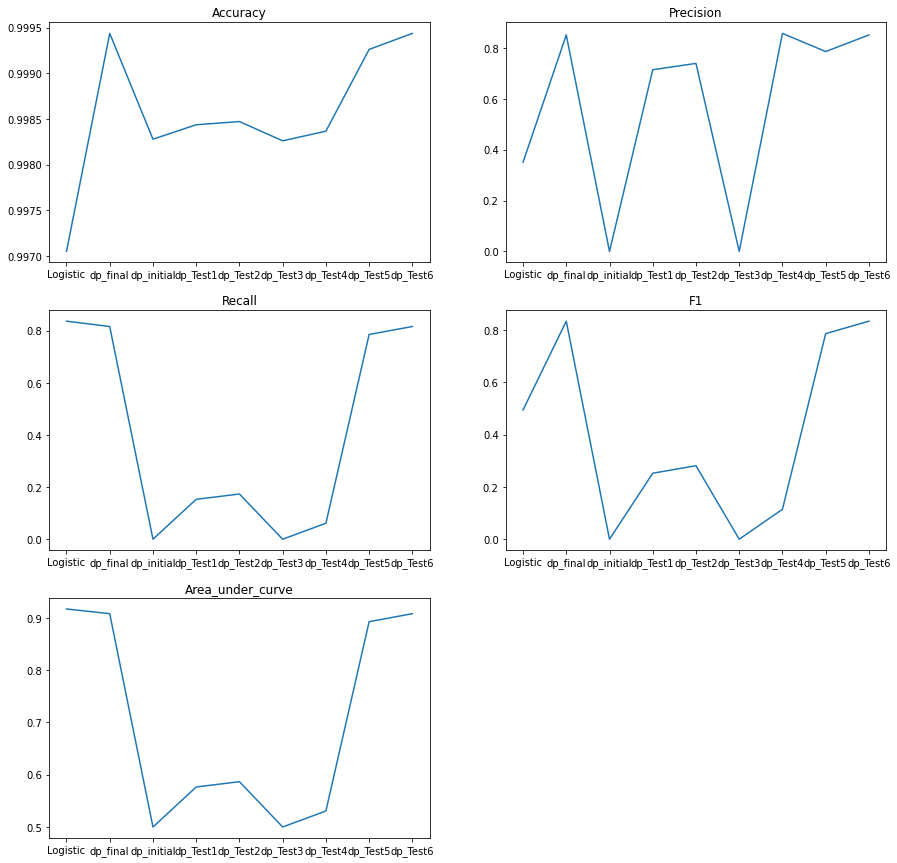

In [206]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(3, 2, 1)
plt.plot(metric_df_dp.accuracy)
plt.title('Accuracy')

ax = fig.add_subplot(3, 2, 2)
plt.plot(metric_df_dp.precision)
plt.title('Precision')

ax = fig.add_subplot(3,2,3)
plt.plot(metric_df_dp.recall)
plt.title('Recall')

ax = fig.add_subplot(3, 2, 4)
plt.plot(metric_df_dp.f1)
plt.title('F1')

ax = fig.add_subplot(3,2, 5)
plt.plot(metric_df_dp.auc)
plt.title('Area_under_curve')


In [132]:
metric_df_lg_cp = metric_df_lg.copy()

In [144]:
metric_df_lg_cp.drop('deep_learning_Test6', inplace=True)

In [145]:
metric_df_lg_cp

,accuracy,precision,recall,f1,auc
logistic_regression,0.997051,0.350427,0.836735,0.493976,0.917031
deep_learning_final,0.999438,0.851064,0.816327,0.833333,0.908040
deep_learning_initial,0.998279,0.000000,0.000000,0.000000,0.500000


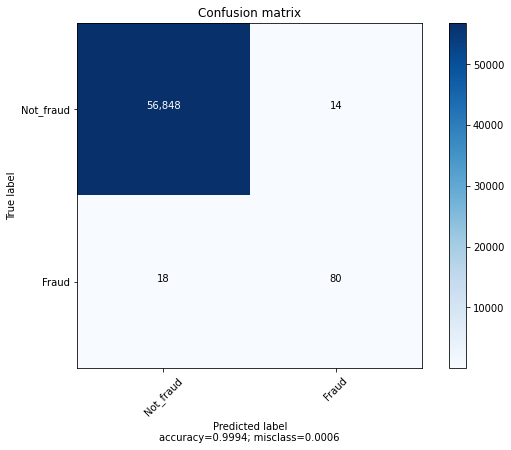

In [131]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_dp),
                          ['Not_fraud', 'Fraud'],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False)

tensorflow.random.set_seed(123)

model_dp = Sequential() model_dp.add(Dense(60, input_shape=(30, ), activation='relu')) model_dp.add(Dense(30, activation='relu'))

model_dp.add(Dense(1, activation='sigmoid')) history = History()
opt = keras.optimizers.Adam(learning_rate=0.001) model_dp.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) #print(model_dp.evaluate(X_val_sm_sp, Y_val_sm_sp)) model_dp.fit(X_train_smu_sp, Y_train_smu_sp, validation_data=(X_val_smu_sp, Y_val_smu_sp), batch_size=128, epochs=20, callbacks=[history], verbose=1)

score_test = model_dp.evaluate(X_test, y_test,verbose=0) print(score_test)

In [127]:
# Let's tunning the hyperparameter using cross-validation

In [191]:
def build_model(units, act):
    model = Sequential()
    for layer_i, unit in enumerate(units):
        print(layer_i, unit)
        if layer_i == 0:
            model.add(Dense(unit, input_shape=(30, ), activation=act))
        else:
            model.add(Dense(unit, activation=act))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    print(model.summary())
    return model

In [197]:
activation_funs = ['relu']
#activation_funs = ['relu']
units_cmb = [[80, 40], [40, 20], [60, 30, 20]] 
#units_cmb = [[2, 4, 4]]
batch_size = [64, 32]
#batch_size = [64]

In [216]:
tensorflow.random.set_seed(123)
histories = {}
scores={}
avg_score_list = {}
avg_f1_scores={}
y_pred_cmb_dp = {}

for act in activation_funs:
    for bat in batch_size:
        for units in units_cmb:
            avg_score_tmp = []
            f1_score_tmp = []
            for train_ind, val_ind in kfold.split(X_train_sm):    
                X_train_kfold, X_val_kfold = np.array(X_train_sm)[train_ind], np.array(X_train_sm)[val_ind]
                Y_train_kfold, Y_val_kfold = np.array(Y_train_sm)[train_ind], np.array(Y_train_sm)[val_ind]
    
                
                model1 = build_model(units, act)
                history = History()
                model1.fit(X_train_kfold, Y_train_kfold, validation_data=(X_val_kfold, Y_val_kfold), batch_size=bat, epochs=20, callbacks=[history], verbose=1)
                y_pre_dp = model1.predict(X_val_kfold)
                y_pred_dp = y_pre_dp>0.5
                
                f1_score_tmp.append(f1_score(Y_val_kfold, y_pred_dp))                
      #          avg_score_tmp.append(score[1])
                histories[f'{act}_neu_{units}_bat{bat}'] = history.history
         #       scores['{act}_neu_{units}_bat{bat}'] = score
                
                y_pred_cmb_dp[f'{act}_neu_{units}_bat{bat}'] = y_pred_dp
                print(f'{act}_neu_{units}_bat{bat}')
       #         output = pd.Series(y_pred_cmb_dp)
          #      output.to_csv("deep_learning.csv")
               
  #          avg_score_list['{act}_neu_{units}_bat{bat}'] = np.mean(avg_score_tmp)
            avg_f1_scores[f'{act}_neu_{units}_bat{bat}'] = np.mean(f1_score_tmp)

0 80
1 40
Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_210 (Dense)           (None, 80)                2480      
                                                                 
 dense_211 (Dense)           (None, 40)                3240      
                                                                 
 dense_212 (Dense)           (None, 1)                 41        
                                                                 
Total params: 5,761
Trainable params: 5,761
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
3128/3128 [==============================] - 5s 1ms/step - loss: 31.2208 - accuracy: 0.8829 - val_loss: 7.7691 - val_accuracy: 0.9527
Epoch 2/20
3128/3128 [==============================] - 4s 1ms/step - loss: 10.7975 - accuracy: 0.9279 - val_loss: 23.3497 - val_accuracy: 0.9386
Epoch 3/2

Total params: 5,761
Trainable params: 5,761
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
3128/3128 [==============================] - 5s 1ms/step - loss: 36.1823 - accuracy: 0.8786 - val_loss: 15.7339 - val_accuracy: 0.9436
Epoch 2/20
3128/3128 [==============================] - 4s 1ms/step - loss: 14.2347 - accuracy: 0.9256 - val_loss: 40.5896 - val_accuracy: 0.9374
Epoch 3/20
3128/3128 [==============================] - 4s 1ms/step - loss: 9.0635 - accuracy: 0.9473 - val_loss: 4.2066 - val_accuracy: 0.9655
Epoch 4/20
3128/3128 [==============================] - 4s 1ms/step - loss: 5.3981 - accuracy: 0.9546 - val_loss: 0.3728 - val_accuracy: 0.9645
Epoch 5/20
3128/3128 [==============================] - 4s 1ms/step - loss: 2.3914 - accuracy: 0.9662 - val_loss: 1.3018 - val_accuracy: 0.9780
Epoch 6/20
3128/3128 [==============================] - 4s 1ms/step - loss: 1.7479 - accuracy: 0.9693 - val_loss: 0.3913 - val_accuracy: 

3128/3128 [==============================] - 4s 1ms/step - loss: 3.8312 - accuracy: 0.9672 - val_loss: 0.4848 - val_accuracy: 0.9835
Epoch 8/20
3128/3128 [==============================] - 4s 1ms/step - loss: 2.9194 - accuracy: 0.9710 - val_loss: 8.5475 - val_accuracy: 0.9619
Epoch 9/20
3128/3128 [==============================] - 4s 1ms/step - loss: 2.7563 - accuracy: 0.9717 - val_loss: 1.5320 - val_accuracy: 0.9838
Epoch 10/20
3128/3128 [==============================] - 4s 1ms/step - loss: 2.0751 - accuracy: 0.9745 - val_loss: 2.4010 - val_accuracy: 0.9795
Epoch 11/20
3128/3128 [==============================] - 4s 1ms/step - loss: 1.9634 - accuracy: 0.9762 - val_loss: 0.2812 - val_accuracy: 0.9815
Epoch 12/20
3128/3128 [==============================] - 4s 1ms/step - loss: 1.5201 - accuracy: 0.9778 - val_loss: 0.2472 - val_accuracy: 0.9808
Epoch 13/20
3128/3128 [==============================] - 4s 1ms/step - loss: 1.4697 - accuracy: 0.9767 - val_loss: 0.2212 - val_accuracy: 0.9876

3128/3128 [==============================] - 4s 1ms/step - loss: 0.2551 - accuracy: 0.9323 - val_loss: 0.2617 - val_accuracy: 0.9269
Epoch 12/20
3128/3128 [==============================] - 4s 1ms/step - loss: 0.2500 - accuracy: 0.9312 - val_loss: 0.2642 - val_accuracy: 0.9245
Epoch 13/20
3128/3128 [==============================] - 4s 1ms/step - loss: 0.2721 - accuracy: 0.9245 - val_loss: 0.2791 - val_accuracy: 0.9195
Epoch 14/20
3128/3128 [==============================] - 4s 1ms/step - loss: 0.2666 - accuracy: 0.9248 - val_loss: 0.2792 - val_accuracy: 0.9194
Epoch 15/20
3128/3128 [==============================] - 4s 1ms/step - loss: 0.2558 - accuracy: 0.9330 - val_loss: 0.2675 - val_accuracy: 0.9244
Epoch 16/20
3128/3128 [==============================] - 4s 1ms/step - loss: 0.2616 - accuracy: 0.9277 - val_loss: 0.2681 - val_accuracy: 0.9239
Epoch 17/20
3128/3128 [==============================] - 4s 1ms/step - loss: 0.2531 - accuracy: 0.9301 - val_loss: 0.2677 - val_accuracy: 0.92

3128/3128 [==============================] - 4s 1ms/step - loss: 0.3076 - accuracy: 0.9092 - val_loss: 0.3046 - val_accuracy: 0.9091
Epoch 17/20
3128/3128 [==============================] - 4s 1ms/step - loss: 0.3060 - accuracy: 0.9092 - val_loss: 0.3046 - val_accuracy: 0.9090
Epoch 18/20
3128/3128 [==============================] - 4s 1ms/step - loss: 0.3071 - accuracy: 0.9092 - val_loss: 0.3047 - val_accuracy: 0.9091
Epoch 19/20
3128/3128 [==============================] - 4s 1ms/step - loss: 0.3119 - accuracy: 0.9092 - val_loss: 0.3047 - val_accuracy: 0.9090
Epoch 20/20
1564/1564 [==============================] - 1s 686us/step
relu_neu_[60, 30, 20]_bat64
0 60
1 30
2 20
Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_252 (Dense)           (None, 60)                1860      
                                                                 
 dense_253 (Dense)           (N

 Layer (type)                Output Shape              Param #   
 dense_266 (Dense)           (None, 80)                2480      
                                                                 
 dense_267 (Dense)           (None, 40)                3240      
                                                                 
 dense_268 (Dense)           (None, 1)                 41        
                                                                 
Total params: 5,761
Trainable params: 5,761
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
6255/6255 [==============================] - 7s 1ms/step - loss: 51.6791 - accuracy: 0.8929 - val_loss: 68.1456 - val_accuracy: 0.9377
Epoch 2/20
6255/6255 [==============================] - 7s 1ms/step - loss: 14.6424 - accuracy: 0.9425 - val_loss: 0.9010 - val_accuracy: 0.9802
Epoch 3/20
6255/6255 [==============================] - 7s 1ms/step - loss: 5.2843 - accuracy: 0.9604 - val_

Total params: 5,761
Trainable params: 5,761
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
6255/6255 [==============================] - 7s 1ms/step - loss: 26.3299 - accuracy: 0.8952 - val_loss: 1.5050 - val_accuracy: 0.9735
Epoch 2/20
6255/6255 [==============================] - 7s 1ms/step - loss: 6.4167 - accuracy: 0.9425 - val_loss: 7.1565 - val_accuracy: 0.9570
Epoch 3/20
6255/6255 [==============================] - 7s 1ms/step - loss: 1.8466 - accuracy: 0.9641 - val_loss: 0.2941 - val_accuracy: 0.9852
Epoch 4/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.4472 - accuracy: 0.9655 - val_loss: 0.2571 - val_accuracy: 0.9282
Epoch 5/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.2360 - accuracy: 0.9378 - val_loss: 0.2809 - val_accuracy: 0.9186
Epoch 6/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.2832 - accuracy: 0.9197 - val_loss: 0.2697 - val_accuracy: 0.9

6255/6255 [==============================] - 7s 1ms/step - loss: 2.7317 - accuracy: 0.9682 - val_loss: 0.3372 - val_accuracy: 0.9829
Epoch 5/20
6255/6255 [==============================] - 7s 1ms/step - loss: 1.5141 - accuracy: 0.9727 - val_loss: 0.2301 - val_accuracy: 0.9876
Epoch 6/20
6255/6255 [==============================] - 7s 1ms/step - loss: 1.0900 - accuracy: 0.9747 - val_loss: 0.7602 - val_accuracy: 0.9758
Epoch 7/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.0788 - accuracy: 0.9869 - val_loss: 0.0671 - val_accuracy: 0.9869
Epoch 8/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.2619 - accuracy: 0.9310 - val_loss: 0.1832 - val_accuracy: 0.9576
Epoch 9/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.2124 - accuracy: 0.9450 - val_loss: 0.2617 - val_accuracy: 0.9271
Epoch 10/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.2666 - accuracy: 0.9249 - val_loss: 0.2752 - val_accuracy: 0.9213
Ep

6255/6255 [==============================] - 7s 1ms/step - loss: 0.2616 - accuracy: 0.9272 - val_loss: 0.2680 - val_accuracy: 0.9238
Epoch 9/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.2646 - accuracy: 0.9274 - val_loss: 0.2678 - val_accuracy: 0.9240
Epoch 10/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.2764 - accuracy: 0.9238 - val_loss: 0.2690 - val_accuracy: 0.9237
Epoch 11/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.2676 - accuracy: 0.9250 - val_loss: 0.2683 - val_accuracy: 0.9243
Epoch 12/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.2689 - accuracy: 0.9273 - val_loss: 0.2674 - val_accuracy: 0.9244
Epoch 13/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.2567 - accuracy: 0.9368 - val_loss: 0.2696 - val_accuracy: 0.9238
Epoch 14/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.2487 - accuracy: 0.9328 - val_loss: 0.0859 - val_accuracy: 0.987

6255/6255 [==============================] - 7s 1ms/step - loss: 0.3066 - accuracy: 0.9092 - val_loss: 0.3046 - val_accuracy: 0.9091
Epoch 14/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.3402 - accuracy: 0.9091 - val_loss: 0.3046 - val_accuracy: 0.9091
Epoch 15/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.3039 - accuracy: 0.9095 - val_loss: 0.3048 - val_accuracy: 0.9090
Epoch 16/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.3087 - accuracy: 0.9092 - val_loss: 0.3047 - val_accuracy: 0.9090
Epoch 17/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.3078 - accuracy: 0.9092 - val_loss: 0.3048 - val_accuracy: 0.9090
Epoch 18/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.3044 - accuracy: 0.9092 - val_loss: 0.3047 - val_accuracy: 0.9090
Epoch 19/20
6255/6255 [==============================] - 7s 1ms/step - loss: 0.3206 - accuracy: 0.9092 - val_loss: 0.3045 - val_accuracy: 0.90

In [223]:
avg_f1_scores

{'relu_neu_[80, 40]_bat64': 0.49843871941614404,
 'relu_neu_[40, 20]_bat64': 0.3404522363805734,
 'relu_neu_[60, 30, 20]_bat64': 0.002546962915561877,
 'relu_neu_[80, 40]_bat32': 0.14796811007372326,
 'relu_neu_[40, 20]_bat32': 0.6867565468312617,
 'relu_neu_[60, 30, 20]_bat32': 0.04668667340627404}

In [225]:
histories

{'relu_neu_[80, 40]_bat64': {'loss': [35.85148239135742,
   16.23933982849121,
   9.965609550476074,
   4.48811674118042,
   2.739924192428589,
   2.0543854236602783,
   1.3905411958694458,
   0.8971933126449585,
   0.4759105443954468,
   0.24657192826271057,
   0.15268376469612122,
   0.08560441434383392,
   0.08138545602560043,
   0.10635680705308914,
   0.07255498319864273,
   0.07773817330598831,
   0.08180419355630875,
   0.07449810951948166,
   0.0556853711605072,
   0.059655096381902695],
  'accuracy': [0.8701486587524414,
   0.9168382287025452,
   0.9384717345237732,
   0.9574723243713379,
   0.9638424515724182,
   0.9662806391716003,
   0.9718363881111145,
   0.975788414478302,
   0.9777119159698486,
   0.9833776354789734,
   0.9860556125640869,
   0.9875644445419312,
   0.9835025668144226,
   0.9773871898651123,
   0.9849663972854614,
   0.9836974143981934,
   0.9841770529747009,
   0.9844068288803101,
   0.9885736703872681,
   0.9873695969581604],
  'val_loss': [0.4248670935

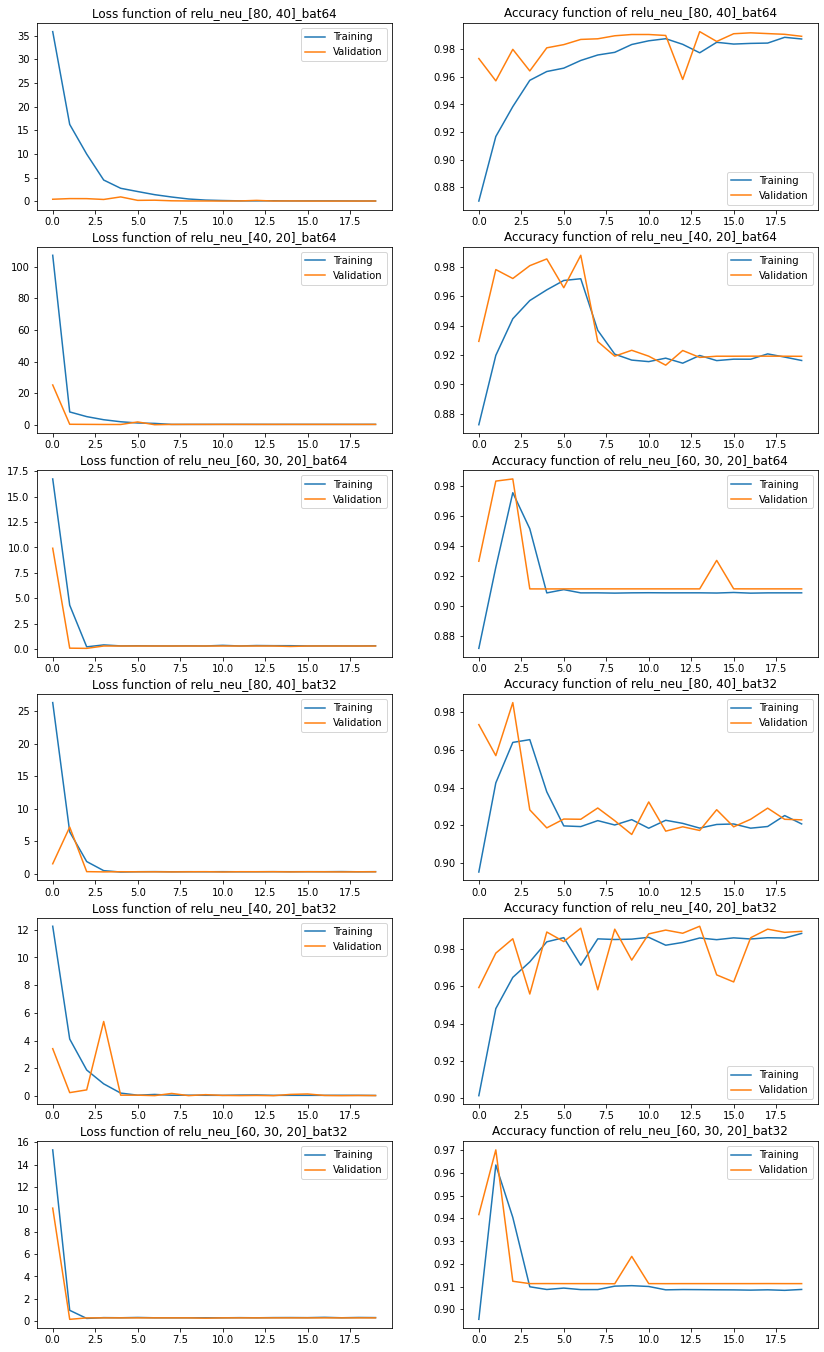

In [253]:
fig = plt.figure(figsize=(14,24))
count = 1
for key, value in histories.items():
    ax = fig.add_subplot(6, 2, count)
    plt.plot(histories[key]['loss'], label = 'Training')
    plt.plot(histories[key]['val_loss'],  label = 'Validation')
    plt.title('Loss function of {}'.format(key))
    ax.legend()
    
    ax = fig.add_subplot(6, 2, count+1)
    plt.plot(histories[key]['accuracy'], label = 'Training')
    plt.plot(histories[key]['val_accuracy'],  label = 'Validation')
    plt.title('Accuracy function of {}'.format(key))
    count=count+2
    ax.legend()

In [194]:
scores

[{'relu_neu_[100, 80, 40]_bat128': [0.4483191967010498, 0.8346126079559326]},
 {'relu_neu_[100, 80, 40]_bat128': [0.4518621563911438, 0.8324692845344543]},
 {'relu_neu_[100, 80, 40]_bat128': [0.4473668038845062, 0.8353637456893921]},
 {'relu_neu_[100, 80, 40]_bat128': [0.44997674226760864, 0.8336417078971863]},
 {'relu_neu_[100, 80, 40]_bat128': [0.4530842900276184, 0.8317365050315857]},
 {'relu_neu_[80, 60, 40]_bat128': [0.4483712911605835, 0.8345943093299866]},
 {'relu_neu_[80, 60, 40]_bat128': [0.4521513879299164, 0.8323410153388977]},
 {'relu_neu_[80, 60, 40]_bat128': [0.4478331208229065, 0.8352721333503723]},
 {'relu_neu_[80, 60, 40]_bat128': [0.4505130648612976, 0.8333669304847717]},
 {'relu_neu_[80, 60, 40]_bat128': [0.4529837667942047, 0.8317548036575317]},
 {'relu_neu_[60, 60, 30, 20]_bat128': [0.4486890137195587,
   0.8344660997390747]},
 {'relu_neu_[60, 60, 30, 20]_bat128': [0.45238181948661804,
   0.8322128057479858]},
 {'relu_neu_[60, 60, 30, 20]_bat128': [0.44760146737098

In [407]:
avg_f1_scores

[{'relu_neu_[100, 80, 40]_bat128': 0.4614616301545893},
 {'relu_neu_[80, 60, 40]_bat128': 0.648798634792179},
 {'relu_neu_[60, 60, 30, 20]_bat128': 0.41032233981800603},
 {'relu_neu_[100, 80, 40]_bat64': 0.6445182187135273},
 {'relu_neu_[80, 60, 40]_bat64': 0.5774724644905064},
 {'relu_neu_[60, 60, 30, 20]_bat64': 0.6329217578507261},
 {'relu_neu_[100, 80, 40]_bat32': 0.5733131560062186},
 {'relu_neu_[80, 60, 40]_bat32': 0.7597026281919363},
 {'relu_neu_[60, 60, 30, 20]_bat32': 0.763504297507789},
 {'sigmoid_neu_[100, 80, 40]_bat128': 0.0},
 {'sigmoid_neu_[80, 60, 40]_bat128': 0.0},
 {'sigmoid_neu_[60, 60, 30, 20]_bat128': 0.0},
 {'sigmoid_neu_[100, 80, 40]_bat64': 0.0},
 {'sigmoid_neu_[80, 60, 40]_bat64': 0.0},
 {'sigmoid_neu_[60, 60, 30, 20]_bat64': 0.0},
 {'sigmoid_neu_[100, 80, 40]_bat32': 0.0},
 {'sigmoid_neu_[80, 60, 40]_bat32': 0.0},
 {'sigmoid_neu_[60, 60, 30, 20]_bat32': 0.0}]

In [ ]:
# we will pick 

In [ ]:
tensorflow.random.set_seed(123)

model_dptmp = Sequential()
model_dptmp.add(Dense(80, input_shape=(30, ), activation='relu'))
model_dptmp.add(Dense(60, activation='relu'))
model_dptmp.add(Dense(40, activation='relu'))

model_dptmp.add(Dense(1, activation='sigmoid'))
history = History()    
model_dptmp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dptmp.fit(X_train_sm, Y_train_sm, batch_size=64, epochs=20, callbacks=[history], verbose=1)

score_testtmp = model_dptmp.evaluate(X_test, y_test,verbose=0)
print(score_testtmp)


## Logistic regression

In [49]:
# Let's create an intial model 
lr = linear_model.LogisticRegression(solver='lbfgs', penalty='none', max_iter=10000, random_state=123)
lr.fit(X_train_sm, Y_train_sm)
y_pred_lr = lr.predict(X_test)

lr_test_score = lr.score(X_test, y_test)
lr_train_score = lr.score(X_train_sm, Y_train_sm)

In [50]:
print(lr_test_score)
print(lr_train_score)

0.9970505617977528
0.9903113633638435


In [51]:
results_lr = opt_metric(y_test, y_pred_lr)
metric_df.loc['logistic_regression'] = results_lr

Accuracy score: 1.00
Precision score: 0.35
Recall score: 0.84
F1 score: 0.49
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56862
       Fraud       0.35      0.84      0.49        98

    accuracy                           1.00     56960
   macro avg       0.68      0.92      0.75     56960
weighted avg       1.00      1.00      1.00     56960



In [52]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

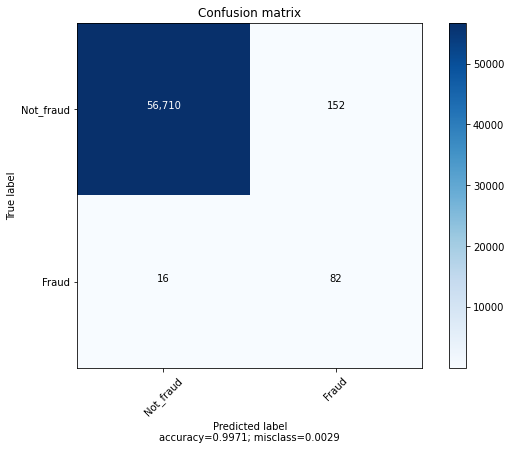

In [53]:
plot_confusion_matrix(cm_lr,
                          ['Not_fraud', 'Fraud'],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False)

In [54]:
metric_df_lg = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1', 'auc'], 
                        dtype='float')

In [55]:
metric_df_lg.loc['logistic_regression'] = results_lr

In [57]:
metric_df_lg

,accuracy,precision,recall,f1,auc
logistic_regression,0.997051,0.350427,0.836735,0.493976,0.917031


In [ ]:
#Let's tune the model a little bit
solvers=['lbfgs', 'saga']
penalties=['none', 'l2']
f1_scores_lr=[]

for solver in solvers:
    for penalty in penalties:
        lr = linear_model.LogisticRegression(solver=solver, penalty=penalty, max_iter=10000, random_state=123)
        lr.fit(X_train_sm, Y_train_sm)
        y_pred_lr = lr.predict(X_test)
        f1_scores_lr.append({f'{solver}_{penalty}':f1_score(y_test, y_pred_lr)})

In [ ]:
## SVC 

In [ ]:
#svc = SVC(kernel = 'linear')
#svc.fit(X_train_sm, Y_train_sm)
#y_pred_svc = svc.predict(X_test)

##  Decision tree

In [240]:
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy', max_depth=4, random_state = 123)
decision_tree.fit(X_train_sm_sp, Y_train_sm_sp)

y_pred_dt = decision_tree.predict(X_test)

In [242]:
results_dt = opt_metric(y_test, y_pred_dt)
metric_df_lg.loc['decision_tree'] = results_dt
metric_df_rf.loc['decision_tree'] = results_dt

Accuracy score: 1.00
Precision score: 0.59
Recall score: 0.85
F1 score: 0.69
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56862
       Fraud       0.59      0.85      0.69        98

    accuracy                           1.00     56960
   macro avg       0.79      0.92      0.85     56960
weighted avg       1.00      1.00      1.00     56960



In [285]:
metric_df_lg

,accuracy,precision,recall,f1,auc
logistic_regression,0.997051,0.350427,0.836735,0.493976,0.917031
deep_learning_initial,0.998262,0.000000,0.000000,0.000000,0.499991
deep_learning_final,0.999350,0.867470,0.734694,0.795580,0.867250
decision_tree,0.998754,0.598540,0.836735,0.697872,0.917884


In [287]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

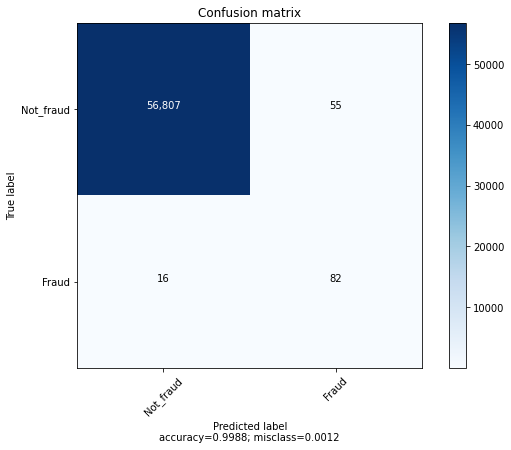

In [288]:
plot_confusion_matrix(cm_dt,
                          ['Not_fraud', 'Fraud'],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False)

## Random forest

In [244]:
rfc = ensemble.RandomForestClassifier(random_state=123)
rfc.fit(X_train_sm_sp, Y_train_sm_sp)

y_pred_rfc = rfc.predict(X_test)

In [247]:
results_rfc = opt_metric(y_test, y_pred_rfc)
#metric_df_lg.loc['random_forest_'] = results_rfc
metric_df_rf.loc['random_forest_initial'] = results_rfc

Accuracy score: 1.00
Precision score: 0.89
Recall score: 0.85
F1 score: 0.87
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56862
       Fraud       0.89      0.85      0.87        98

    accuracy                           1.00     56960
   macro avg       0.95      0.92      0.93     56960
weighted avg       1.00      1.00      1.00     56960



In [235]:
metric_df_rf = metric_df_lg.copy()

In [251]:
metric_df_rf.drop(['deep_learning_Test1', 'deep_learning_Test2', 'deep_learning_Test3', 'deep_learning_Test4',
                  'deep_learning_Test5', 'deep_learning_Test6', 'random_forest_'], inplace=True)

In [252]:
metric_df_rf

,accuracy,precision,recall,f1,auc
logistic_regression,0.997051,0.350427,0.836735,0.493976,0.917031
deep_learning_final,0.999438,0.851064,0.816327,0.833333,0.908040
deep_learning_initial,0.998279,0.000000,0.000000,0.000000,0.500000
decision_tree,0.998718,0.588652,0.846939,0.694561,0.922959
random_forest_initial,0.999561,0.892473,0.846939,0.869110,0.923381


In [291]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

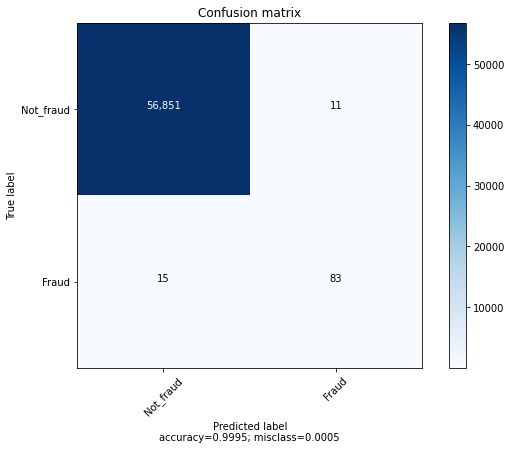

In [292]:
plot_confusion_matrix(cm_rfc,
                          ['Not_fraud', 'Fraud'],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False)

In [274]:
#(X_train_sm_sp, Y_train_sm_sp, validation_data=(X_val_sm_sp, Y_val_sm_sp)

n_estimators = [40, 80, 120]
max_depths = [8, 18, 12]
#n_estimators = [10]
#max_depths = [1]
#params = {'n_estimators':[300, 500, 1000], 'max_depths':[10, 20, 15], 'bootstrap':('True', 'False'), 'random_state': 123}
y_pred_rfc_cmb = {}
y_pred_rfc_cmbt= {}

for n_estimator in n_estimators:
    for max_dp in max_depths:
        print(f'{n_estimator}_{max_dp}')

        rfc = ensemble.RandomForestRegressor(n_estimators=n_estimator, max_depth = max_dp, random_state=123)
        rfc.fit(X_train_sm_sp, Y_train_sm_sp)
        y_pred_rfc = rfc.predict(X_val_sm_sp)
        y_pred_rfc_cmb[f'{n_estimator}_{max_dp}'] = y_pred_rfc
        
        y_pred_rfc_t = rfc.predict(X_test)
        y_pred_rfc_cmbt[f'{n_estimator}_{max_dp}'] = y_pred_rfc_t
        output = pd.Series(y_pred_rfc_cmb)
    #    output.to_csv("random_forest.csv")
           

40_8
40_18
40_12
80_8
80_18
80_12
120_8
120_18
120_12


In [276]:
y_pred_rfc_cmbt
output1 = pd.Series(y_pred_rfc_cmbt)

In [263]:
for i in range(len(output.index)):
    y_preds_rfc_t1 = output[output.index[i]] > 0.6
    results_rfcs_t1 = opt_metric(Y_val_sm_sp, y_preds_rfc_t1)
    metric_df_rf.loc['random_forest_Test{}'.format(i+1)] = results_rfcs_t1

Accuracy score: 0.99
Precision score: 1.00
Recall score: 0.94
F1 score: 0.97
              precision    recall  f1-score   support

   Not Fraud       0.99      1.00      1.00     45430
       Fraud       1.00      0.94      0.97      4608

    accuracy                           0.99     50038
   macro avg       1.00      0.97      0.98     50038
weighted avg       0.99      0.99      0.99     50038

Accuracy score: 1.00
Precision score: 1.00
Recall score: 0.98
F1 score: 0.99
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     45430
       Fraud       1.00      0.98      0.99      4608

    accuracy                           1.00     50038
   macro avg       1.00      0.99      1.00     50038
weighted avg       1.00      1.00      1.00     50038

Accuracy score: 1.00
Precision score: 1.00
Recall score: 0.97
F1 score: 0.98
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     45430
      

In [278]:
for i in range(len(output1.index)):
    y_preds_rfc_t1 = output1[output1.index[i]] > 0.6
    results_rfcs_t1 = opt_metric(y_test, y_preds_rfc_t1)
    metric_df_rf.loc['random_forest_Test{}'.format(i+1)] = results_rfcs_t1

Accuracy score: 1.00
Precision score: 0.84
Recall score: 0.84
F1 score: 0.84
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56862
       Fraud       0.84      0.84      0.84        98

    accuracy                           1.00     56960
   macro avg       0.92      0.92      0.92     56960
weighted avg       1.00      1.00      1.00     56960

Accuracy score: 1.00
Precision score: 0.91
Recall score: 0.83
F1 score: 0.87
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56862
       Fraud       0.91      0.83      0.87        98

    accuracy                           1.00     56960
   macro avg       0.95      0.91      0.93     56960
weighted avg       1.00      1.00      1.00     56960

Accuracy score: 1.00
Precision score: 0.88
Recall score: 0.83
F1 score: 0.85
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56862
      

Accuracy score: 0.99
Precision score: 1.00
Recall score: 0.94
F1 score: 0.97
              precision    recall  f1-score   support

   Not Fraud       0.99      1.00      1.00     45430
       Fraud       1.00      0.94      0.97      4608

    accuracy                           0.99     50038
   macro avg       1.00      0.97      0.98     50038
weighted avg       0.99      0.99      0.99     50038



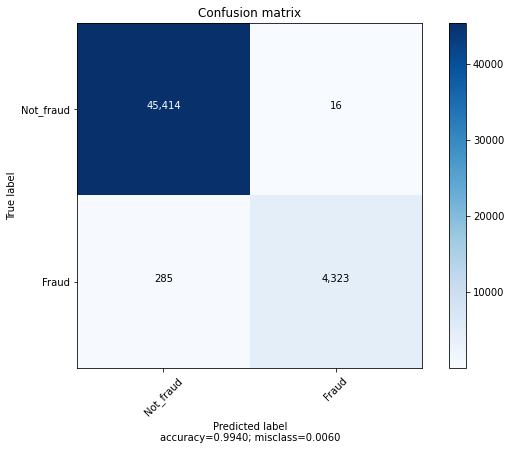

In [257]:

y_preds_rfc_t1 = output['40_8'] > 0.6
results_rfcs_t1 = opt_metric(Y_val_sm_sp, y_preds_rfc_t1)
metric_df_rf.loc['random_forest_Test1'] = results_rfcs_t1

cm_rfc = confusion_matrix(Y_val_sm_sp, y_preds_rfc_t1)

plot_confusion_matrix(cm_rfc,
                          ['Not_fraud', 'Fraud'],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False)

In [280]:
for i in range(1):
    y_preds_rfc_t1 = output1[output1.index[i]] > 0.6
    results_rfcs_t1 = opt_metric(y_test, y_preds_rfc_t1)
    

Accuracy score: 1.00
Precision score: 0.84
Recall score: 0.84
F1 score: 0.84
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56862
       Fraud       0.84      0.84      0.84        98

    accuracy                           1.00     56960
   macro avg       0.92      0.92      0.92     56960
weighted avg       1.00      1.00      1.00     56960



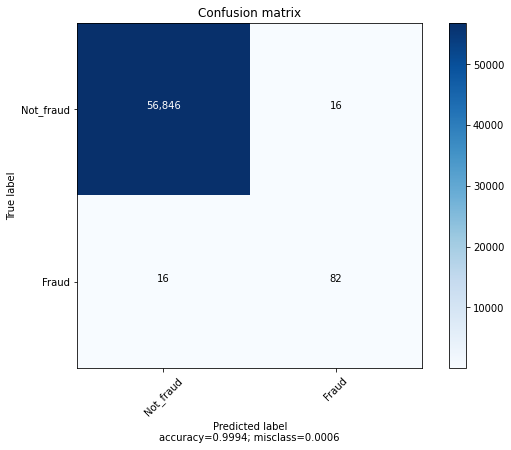

In [281]:
cm_rfc = confusion_matrix(y_test, y_preds_rfc_t1)
plot_confusion_matrix(cm_rfc,
                          ['Not_fraud', 'Fraud'],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False)

In [279]:
metric_df_rf

,accuracy,precision,recall,f1,auc
logistic_regression,0.997051,0.350427,0.836735,0.493976,0.917031
deep_learning_final,0.999438,0.851064,0.816327,0.833333,0.908040
deep_learning_initial,0.998279,0.000000,0.000000,0.000000,0.500000
decision_tree,0.998718,0.588652,0.846939,0.694561,0.922959
random_forest_initial,0.999561,0.892473,0.846939,0.869110,0.923381
random_forest_Test1,0.999438,0.836735,0.836735,0.836735,0.918227
random_forest_Test2,0.999561,0.910112,0.826531,0.866310,0.913195
random_forest_Test3,0.999508,0.880435,0.826531,0.852632,0.913169
random_forest_Test4,0.999421,0.828283,0.836735,0.832487,0.918218
random_forest_Test5,0.999544,0.900000,0.826531,0.861702,0.913186


In [304]:
metric_df_rf_tmp = metric_df_rf.copy()
metric_df_rf_tmp.drop('random_forest_initial', inplace=True)
metric_df_rf_tmp.rename({'random_forest_Test1':'random_forest_initial', 'random_forest_Test8': 'random_forest_final'}, axis='index', inplace=True) 
metric_df_rf_tmp.drop(['random_forest_Test2', 'random_forest_Test3', 'random_forest_Test4', 'random_forest_Test5', 
                       'random_forest_Test6', 'random_forest_Test7', 'random_forest_Test9'],inplace=True)

In [305]:
metric_df_rf_tmp

,accuracy,precision,recall,f1,auc
logistic_regression,0.997051,0.350427,0.836735,0.493976,0.917031
deep_learning_final,0.999438,0.851064,0.816327,0.833333,0.908040
deep_learning_initial,0.998279,0.000000,0.000000,0.000000,0.500000
decision_tree,0.998718,0.588652,0.846939,0.694561,0.922959
random_forest_initial,0.999438,0.836735,0.836735,0.836735,0.918227
random_forest_final,0.999544,0.900000,0.826531,0.861702,0.913186


In [293]:
metric_df_rf_tmp2 = metric_df_rf.copy()
metric_df_rf_tmp2.drop(['logistic_regression', 'deep_learning_final', 'deep_learning_initial', 'decision_tree', 'random_forest_initial'], inplace=True)
metric_df_rf_tmp2

,accuracy,precision,recall,f1,auc
random_forest_Test1,0.999438,0.836735,0.836735,0.836735,0.918227
random_forest_Test2,0.999561,0.910112,0.826531,0.866310,0.913195
random_forest_Test3,0.999508,0.880435,0.826531,0.852632,0.913169
random_forest_Test4,0.999421,0.828283,0.836735,0.832487,0.918218
random_forest_Test5,0.999544,0.900000,0.826531,0.861702,0.913186
random_forest_Test6,0.999508,0.880435,0.826531,0.852632,0.913169
random_forest_Test7,0.999421,0.828283,0.836735,0.832487,0.918218
random_forest_Test8,0.999544,0.900000,0.826531,0.861702,0.913186
random_forest_Test9,0.999491,0.870968,0.826531,0.848168,0.913160


In [297]:
metric_df_rf_tmp2.rename({'random_forest_Test1':'Test1', 'random_forest_Test2':'Test2', 
                    'random_forest_Test3': 'Test3', 'random_forest_Test4': 'Test4', 'random_forest_Test5': 'Test5',
                    'random_forest_Test6': 'Test6', 'random_forest_Test7': 'Test7', 'random_forest_Test8': 'Test8',
                    'random_forest_Test9': 'Test9'}, axis='index', inplace=True)

Text(0.5, 1.0, 'Area_under_curve')

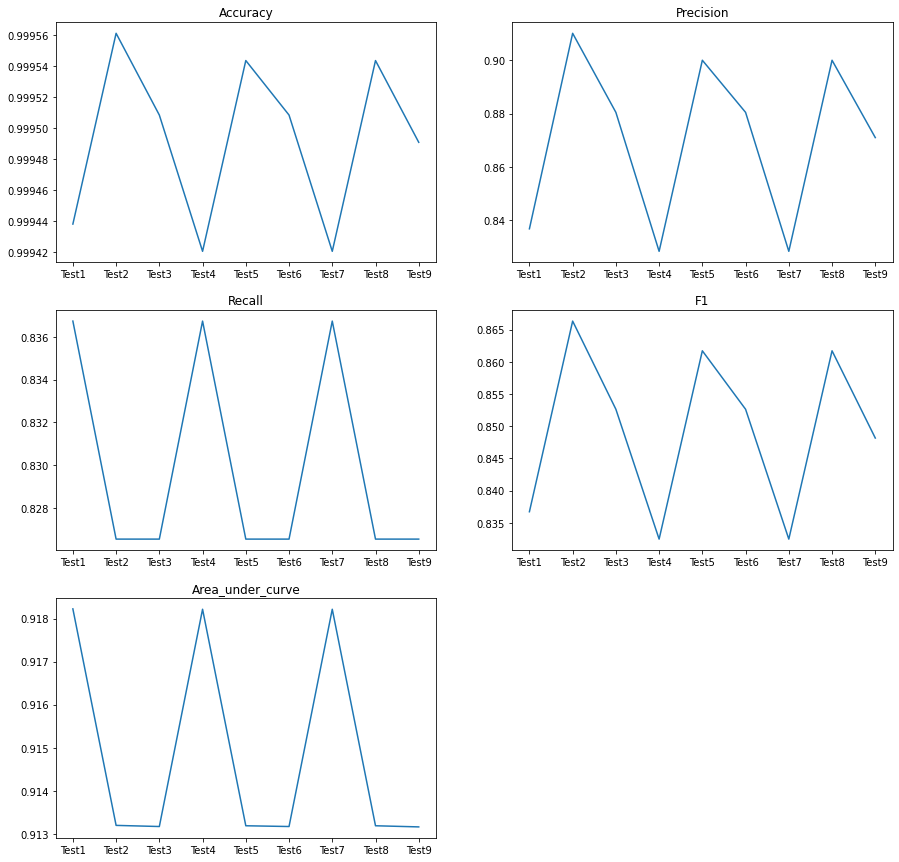

In [298]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(3, 2, 1)
plt.plot(metric_df_rf_tmp2.accuracy)
plt.title('Accuracy')

ax = fig.add_subplot(3, 2, 2)
plt.plot(metric_df_rf_tmp2.precision)
plt.title('Precision')

ax = fig.add_subplot(3,2,3)
plt.plot(metric_df_rf_tmp2.recall)
plt.title('Recall')

ax = fig.add_subplot(3, 2, 4)
plt.plot(metric_df_rf_tmp2.f1)
plt.title('F1')

ax = fig.add_subplot(3,2, 5)
plt.plot(metric_df_rf_tmp2.auc)
plt.title('Area_under_curve')


In [265]:
rfc_fnl = ensemble.RandomForestClassifier(n_estimators=120, max_depth = 18, random_state=123)
rfc_fnl.fit(X_train_sm_sp, Y_train_sm_sp)

y_pred_rfcfnl = rfc_fnl.predict(X_test)

In [266]:
results_rfcfnl = opt_metric(y_test, y_pred_rfcfnl)

#y_preds_rfc_fnl = y_pred_rfcfnl['40_8'] > 0.6
#results_rfcs_fnl = opt_metric(Y_val_sm_sp, y_preds_rfc_t1)
#metric_df_rf.loc['random_forest_Test1'] = results_rfcs_t1


Accuracy score: 1.00
Precision score: 0.89
Recall score: 0.85
F1 score: 0.87
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56862
       Fraud       0.89      0.85      0.87        98

    accuracy                           1.00     56960
   macro avg       0.95      0.92      0.93     56960
weighted avg       1.00      1.00      1.00     56960



In [273]:
#rfc_ini = ensemble.RandomForestRegressor(random_state=123)
#rfc_ini.fit(X_train_sm_sp, Y_train_sm_sp)
#y_pred_rfc_ini = rfc_ini.predict(X_val_sm_sp)

y_preds_rfc_iniup = y_pred_rfc_ini > 0.6
results_rfcfnl = opt_metric(Y_val_sm_sp, y_preds_rfc_iniup)

Accuracy score: 1.00
Precision score: 1.00
Recall score: 0.99
F1 score: 0.99
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     45430
       Fraud       1.00      0.99      0.99      4608

    accuracy                           1.00     50038
   macro avg       1.00      0.99      1.00     50038
weighted avg       1.00      1.00      1.00     50038



## Boost model

In [306]:
params = {'n_estimators': 200,
          'max_depth': 2,
          'loss': 'deviance'}

bst_mdl = ensemble.GradientBoostingClassifier(**params)
bst_mdl.fit(X_train_sm_sp, Y_train_sm_sp)
y_pred_bst = bst_mdl.predict(X_test)

In [307]:
y_pred_bst

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [354]:
results_bst = opt_metric(y_test, y_pred_bst)
metric_df_lg.loc['boost_model'] = results_bst
metric_df_rf_tmp.loc['boost_model_final'] = results_bst

Accuracy score: 1.00
Precision score: 0.85
Recall score: 0.85
F1 score: 0.85
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56862
       Fraud       0.85      0.85      0.85        98

    accuracy                           1.00     56960
   macro avg       0.92      0.92      0.92     56960
weighted avg       1.00      1.00      1.00     56960



In [357]:
metric_df_rf_tmp.drop('boost_model_initial').rename({'boost_model':'boost_model_initial'})

,accuracy,precision,recall,f1,auc
logistic_regression,0.997051,0.350427,0.836735,0.493976,0.917031
deep_learning_final,0.999438,0.851064,0.816327,0.833333,0.908040
deep_learning_initial,0.998279,0.000000,0.000000,0.000000,0.500000
decision_tree,0.998718,0.588652,0.846939,0.694561,0.922959
random_forest_initial,0.999438,0.836735,0.836735,0.836735,0.918227
random_forest_final,0.999544,0.900000,0.826531,0.861702,0.913186
boost_model_initial,0.999192,0.724138,0.857143,0.785047,0.928290
boost_model_final,0.999473,0.846939,0.846939,0.846939,0.923337


In [375]:
metric_df_fnl = metric_df_rf_tmp.drop(['boost_model_initial', 'boost_model','deep_learning_initial','random_forest_initial'])
metric_df_fnl

,accuracy,precision,recall,f1,auc
logistic_regression,0.997051,0.350427,0.836735,0.493976,0.917031
deep_learning_final,0.999438,0.851064,0.816327,0.833333,0.908040
decision_tree,0.998718,0.588652,0.846939,0.694561,0.922959
random_forest_final,0.999544,0.900000,0.826531,0.861702,0.913186
boost_model_final,0.999473,0.846939,0.846939,0.846939,0.923337


Text(0.5, 1.0, 'Area_under_curve')

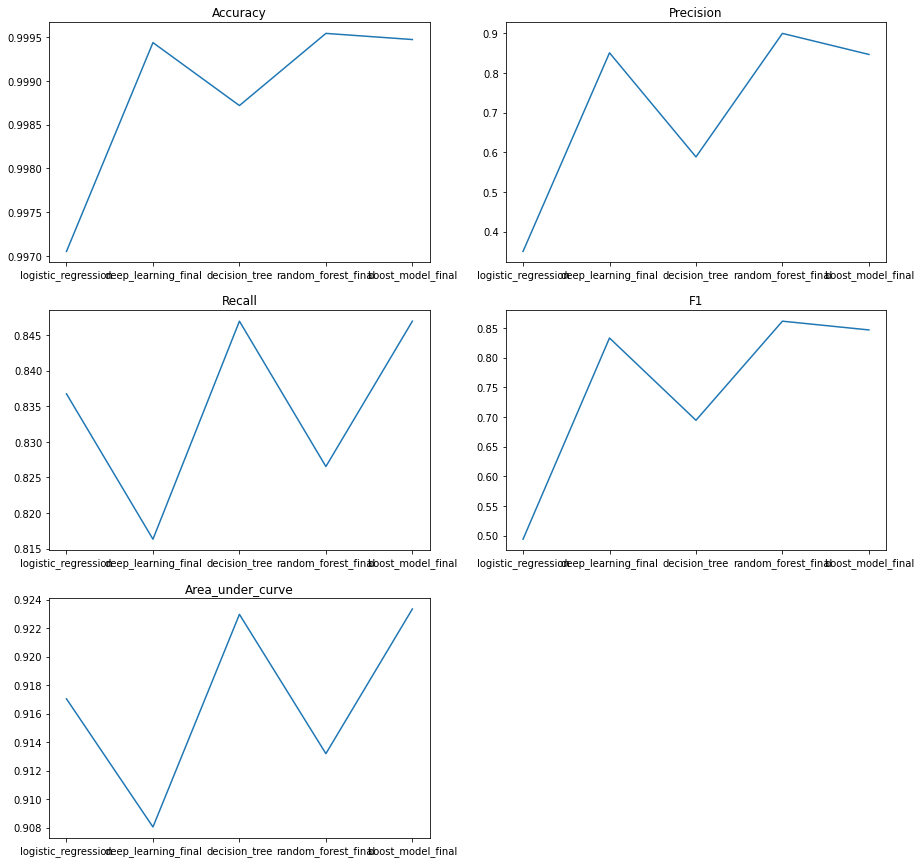

In [376]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(3, 2, 1)
plt.plot(metric_df_fnl.accuracy)
plt.title('Accuracy')

ax = fig.add_subplot(3, 2, 2)
plt.plot(metric_df_fnl.precision)
plt.title('Precision')

ax = fig.add_subplot(3,2,3)
plt.plot(metric_df_fnl.recall)
plt.title('Recall')

ax = fig.add_subplot(3, 2, 4)
plt.plot(metric_df_fnl.f1)
plt.title('F1')

ax = fig.add_subplot(3,2, 5)
plt.plot(metric_df_fnl.auc)
plt.title('Area_under_curve')


In [373]:
metric_df_rf_tmp

,accuracy,precision,recall,f1,auc
logistic_regression,0.997051,0.350427,0.836735,0.493976,0.917031
deep_learning_final,0.999438,0.851064,0.816327,0.833333,0.908040
deep_learning_initial,0.998279,0.000000,0.000000,0.000000,0.500000
decision_tree,0.998718,0.588652,0.846939,0.694561,0.922959
random_forest_initial,0.999438,0.836735,0.836735,0.836735,0.918227
random_forest_final,0.999544,0.900000,0.826531,0.861702,0.913186
boost_model,0.999192,0.724138,0.857143,0.785047,0.928290
boost_model_initial,0.999473,0.846939,0.846939,0.846939,0.923337
boost_model_final,0.999473,0.846939,0.846939,0.846939,0.923337


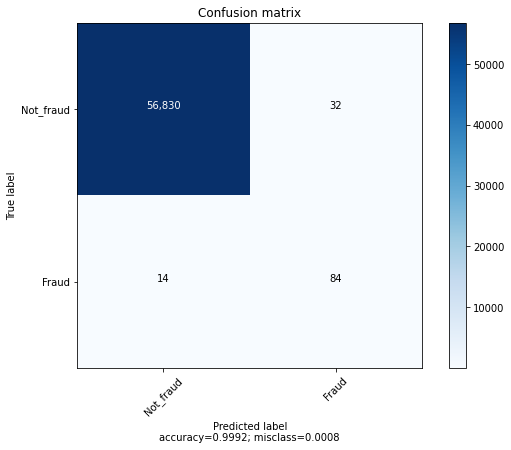

In [310]:
cm_bst = confusion_matrix(y_test, y_pred_bst)
plot_confusion_matrix(cm_bst,
                          ['Not_fraud', 'Fraud'],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False)

In [314]:
n_estimators = [100, 200, 300]
max_depths = [4, 6, 8]
losses = ['deviance']

f1_scores_bst=[]
y_pred_bst_cmbt={}

for n_estimator in n_estimators:
    for max_dp in max_depths:
        for loss in losses:            
            bst_mdl = ensemble.GradientBoostingClassifier(n_estimators=n_estimator, max_depth = max_dp, loss=loss, random_state=123)
            bst_mdl.fit(X_train_sm_sp, Y_train_sm_sp)
            y_pred_bst = bst_mdl.predict(X_test)
            print(n_estimator, max_dp, loss)
            y_pred_bst_cmbt[f'{n_estimator}_{max_dp}_{loss}'] = y_pred_bst
            
            f1_scores_bst.append({f'{n_estimator}_{max_dp}_{loss}':f1_score(y_test, y_pred_bst)})

100 4 deviance
100 6 deviance
100 8 deviance
200 4 deviance
200 6 deviance
200 8 deviance
300 4 deviance
300 6 deviance
300 8 deviance


In [315]:
f1_scores_bst

[{'100_4_deviance': 0.784688995215311},
 {'100_6_deviance': 0.8038277511961723},
 {'100_8_deviance': 0.8316831683168318},
 {'200_4_deviance': 0.7745098039215688},
 {'200_6_deviance': 0.8195121951219512},
 {'200_8_deviance': 0.84},
 {'300_4_deviance': 0.7669902912621359},
 {'300_6_deviance': 0.8484848484848485},
 {'300_8_deviance': 0.8469387755102041}]

In [329]:
y_pred_bst_cmbt

{'100_4_deviance': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 '100_6_deviance': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 '100_8_deviance': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 '200_4_deviance': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 '200_6_deviance': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 '200_8_deviance': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 '300_4_deviance': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 '300_6_deviance': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 '300_8_deviance': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}

In [346]:
metric_df_bsttmp = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1', 'auc'], 
                        dtype='float')

In [347]:
count = 1
for key, value in y_pred_bst_cmbt.items():
    y_preds_bst_t1 = value
    print(key, y_preds_bst_t1)
    results_bsts_t1 = opt_metric(y_test, y_preds_bst_t1)
    metric_df_bsttmp.loc['Test{}'.format(count)] = results_bsts_t1
    count = count + 1

100_4_deviance [0 0 0 ... 0 0 0]
Accuracy score: 1.00
Precision score: 0.74
Recall score: 0.84
F1 score: 0.78
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56862
       Fraud       0.74      0.84      0.78        98

    accuracy                           1.00     56960
   macro avg       0.87      0.92      0.89     56960
weighted avg       1.00      1.00      1.00     56960

100_6_deviance [0 0 0 ... 0 0 0]
Accuracy score: 1.00
Precision score: 0.76
Recall score: 0.86
F1 score: 0.80
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56862
       Fraud       0.76      0.86      0.80        98

    accuracy                           1.00     56960
   macro avg       0.88      0.93      0.90     56960
weighted avg       1.00      1.00      1.00     56960

100_8_deviance [0 0 0 ... 0 0 0]
Accuracy score: 1.00
Precision score: 0.81
Recall score: 0.86
F1 score: 0.83
              pr

100_4_deviance [0 0 0 ... 0 0 0]
100_6_deviance [0 0 0 ... 0 0 0]
100_8_deviance [0 0 0 ... 0 0 0]
200_4_deviance [0 0 0 ... 0 0 0]
200_6_deviance [0 0 0 ... 0 0 0]
200_8_deviance [0 0 0 ... 0 0 0]
300_4_deviance [0 0 0 ... 0 0 0]
300_6_deviance [0 0 0 ... 0 0 0]
Accuracy score: 1.00
Precision score: 0.84
Recall score: 0.86
F1 score: 0.85
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56862
       Fraud       0.84      0.86      0.85        98

    accuracy                           1.00     56960
   macro avg       0.92      0.93      0.92     56960
weighted avg       1.00      1.00      1.00     56960



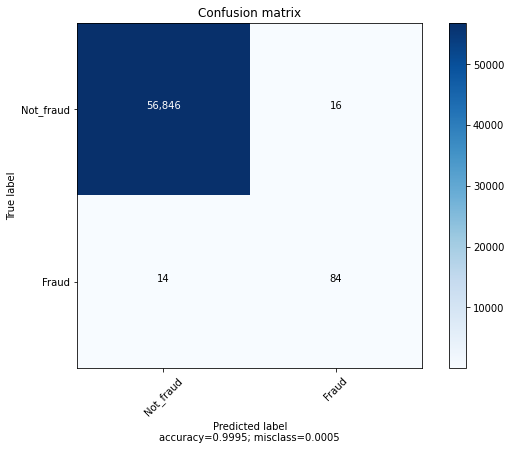

300_8_deviance [0 0 0 ... 0 0 0]


In [351]:
count = 1
for key, value in y_pred_bst_cmbt.items():
    y_preds_bst_t1 = value
    print(key, y_preds_bst_t1)
    if count == 8:
        results_bst = opt_metric(y_test, y_preds_bst_t1)
        cm_bst = confusion_matrix(y_test, y_preds_bst_t1)
        plot_confusion_matrix(cm_bst,
                          ['Not_fraud', 'Fraud'],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False)
    count = count + 1

Text(0.5, 1.0, 'Area_under_curve')

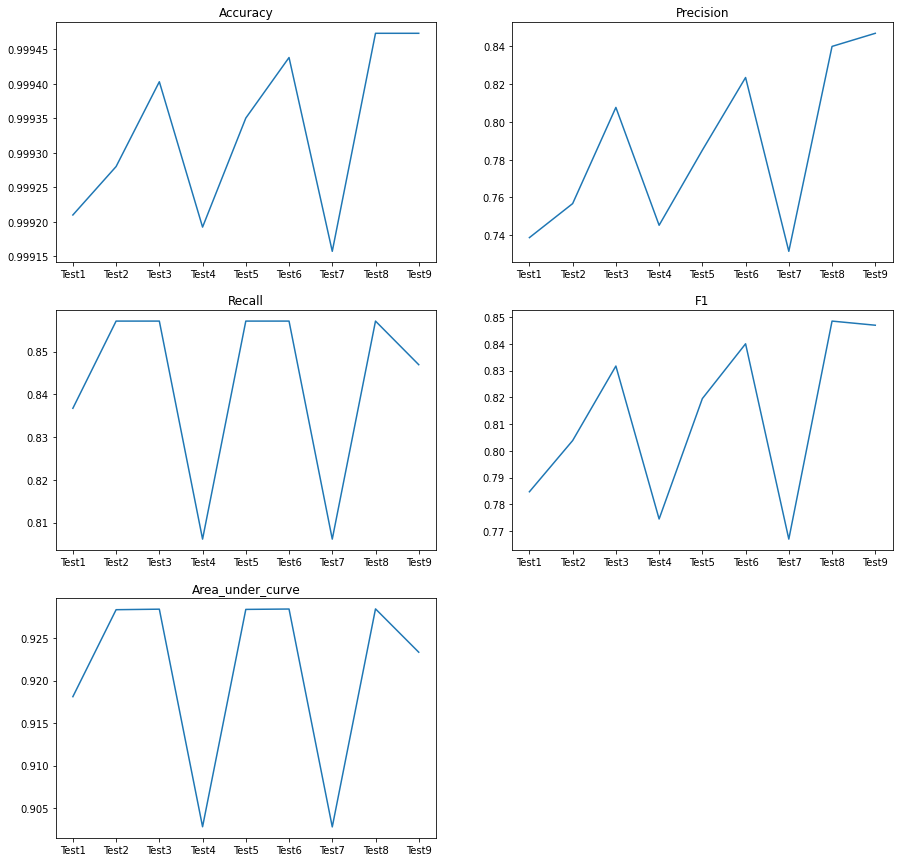

In [348]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(3, 2, 1)
plt.plot(metric_df_bsttmp.accuracy)
plt.title('Accuracy')

ax = fig.add_subplot(3, 2, 2)
plt.plot(metric_df_bsttmp.precision)
plt.title('Precision')

ax = fig.add_subplot(3,2,3)
plt.plot(metric_df_bsttmp.recall)
plt.title('Recall')

ax = fig.add_subplot(3, 2, 4)
plt.plot(metric_df_bsttmp.f1)
plt.title('F1')

ax = fig.add_subplot(3,2, 5)
plt.plot(metric_df_bsttmp.auc)
plt.title('Area_under_curve')


In [344]:
metric_df_bsttmp

,accuracy,precision,recall,f1,auc
boost_model_Test1,0.999210,0.738739,0.836735,0.784689,0.918112
boost_model_Test2,0.999280,0.756757,0.857143,0.803828,0.928334
boost_model_Test3,0.999403,0.807692,0.857143,0.831683,0.928396
boost_model_Test4,0.999192,0.745283,0.806122,0.774510,0.902824
boost_model_Test5,0.999350,0.785047,0.857143,0.819512,0.928369
boost_model_Test6,0.999438,0.823529,0.857143,0.840000,0.928413
boost_model_Test7,0.999157,0.731481,0.806122,0.766990,0.902806
boost_model_Test8,0.999473,0.840000,0.857143,0.848485,0.928431
boost_model_Test9,0.999473,0.846939,0.846939,0.846939,0.923337


In [78]:
metric_df

,accuracy,precision,recall,f1,auc
deep_learning,0.999456,0.860215,0.816327,0.837696,0.908049
logistic_regression,0.986675,0.098420,0.826531,0.175896,0.906741
decision_tree,0.997876,0.440415,0.867347,0.584192,0.932724
random_forest,0.999561,0.901099,0.836735,0.867725,0.918288
boost_model,0.999087,0.691667,0.846939,0.761468,0.923144
